In [218]:
from sklearn.model_selection import cross_validate, train_test_split, LeaveOneGroupOut, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import MultiTaskLassoCV, LassoCV, MultiTaskElasticNetCV, ElasticNetCV
from sklearn.metrics import make_scorer, median_absolute_error  # r2_score,

import numpy as np
import pandas as pd
import os
import seaborn as sns

from SymDesignUtils import start_log
from DesignMetrics import *

In [2]:
%load_ext autoreload
%autoreload 2

In [250]:
# cluster_re_members_map
training_clusters = \
{'2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58': ['2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_84', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_75', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_88', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_80', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_62', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_69', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_53', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_85', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_52', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73'], 
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236': ['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_234', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_228', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_248', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_260', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_263', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_276', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_287', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_306', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_247', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_291', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_296', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_264', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_274', '2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_286', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_222', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_288', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_225', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_233', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_285', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_255', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_223', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_253', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208'], 
 '3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413': ['3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_381', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_404', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_355', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_360', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_386'],
 '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284': ['3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_280', '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_272', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_321', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_235', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_282', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_236', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_213', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301', '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_253', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_257', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_259', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_235', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_209', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_236', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_197', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_241', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_266', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_238', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_313', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_278', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_263', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_254', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_271', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_196', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_298', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_306', '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_258', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_243', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_300', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_248', '3hrx_3m6n-DEGEN_1_1-ROT_24_3-tx_187', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_279', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_294', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_286', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_224', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_280', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_249', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_260', '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_271', '3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_199', '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284', '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_264'],
# ROGERS Designs much of which are more shallow. I am removing the designs which don't constitute a significant cluster 
# Not sure what significant means, but I have removed designs with 7 or fewer designs near the representative. 
# This is indicating the transformational space is rather small and might only capture small perturbations of the pose (mostly translations)
# Ideally, the space is more rough and spans some rotational possibilities. 
# I have removed some with multiple rotations, as ideally, the rotational space would be fairly deep
# Thinking about the 3 degrees between each increment would leave a number of viable options open so we would like to capture on both sides of the increment
 '3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132': ['3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_131', '3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132', '3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_138', '3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_152', '3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_125', '3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_126', '3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129', '3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_136', '3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_152', '3pac_1zoi-DEGEN_1_1-ROT_14_36-tx_113', '3pac_1zoi-DEGEN_1_1-ROT_14_36-tx_124'], 
 '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_182': ['3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_176', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_192', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_206', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_209', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_143', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_147', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_166', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_177'], 
 '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_189': ['3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_186', '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_197', '3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_150', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_157', '3pac_1zoi-DEGEN_1_1-ROT_18_32-tx_134', '3pac_1zoi-DEGEN_1_1-ROT_19_31-tx_136'], 
 '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193': ['3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_125', '3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_138', '3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_143', '3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_148', '3pac_1zoi-DEGEN_1_1-ROT_16_30-tx_157', '3pac_1zoi-DEGEN_1_1-ROT_17_29-tx_155', '3pac_1zoi-DEGEN_1_1-ROT_17_29-tx_157', '3pac_1zoi-DEGEN_1_1-ROT_17_29-tx_171', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_145', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_146', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_147', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_161', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_166', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_174', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_175', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_180', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_184', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_185', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_158', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_176', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_181', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_206', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_207', '3pac_1zoi-DEGEN_1_1-ROT_19_27-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_1_29-tx_213', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_211', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_217', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_248', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_257', '3pac_1zoi-DEGEN_1_1-ROT_2_29-tx_265', '3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_228', '3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_267', '3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_271', '3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_217', '3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_245', '3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_273', '3pac_1zoi-DEGEN_1_1-ROT_4_26-tx_211', '3pac_1zoi-DEGEN_1_1-ROT_4_26-tx_230', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_245', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_258', '3pac_1zoi-DEGEN_1_1-ROT_5_25-tx_208', '3pac_1zoi-DEGEN_1_1-ROT_5_25-tx_218', '3pac_1zoi-DEGEN_1_1-ROT_5_25-tx_224', '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_214', '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_219', '3pac_1zoi-DEGEN_1_1-ROT_6_24-tx_271', '3pac_1zoi-DEGEN_1_1-ROT_6_25-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_7_24-tx_261', '3pac_1zoi-DEGEN_1_1-ROT_7_24-tx_279', '3pac_1zoi-DEGEN_1_1-ROT_7_24-tx_287'], 
 '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201': ['3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_170', '3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_130', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_144', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_159', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_163', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_168', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_186', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_196', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_197', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_207', '3pac_1zoi-DEGEN_1_1-ROT_18_30-tx_219', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_150', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_159', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_162', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_171', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_177', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_181', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_203', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_164', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_175', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_195', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_239', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_129', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_140', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_146', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_170', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_176', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_213', '3pac_1zoi-DEGEN_1_1-ROT_21_27-tx_214', '3pac_1zoi-DEGEN_1_1-ROT_22_26-tx_161', '3pac_1zoi-DEGEN_1_1-ROT_22_26-tx_165', '3pac_1zoi-DEGEN_1_1-ROT_22_26-tx_190', '3pac_1zoi-DEGEN_1_1-ROT_22_26-tx_194', '3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_268'], 
 '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_179': ['3pac_1zoi-DEGEN_1_1-ROT_17_32-tx_150', '3pac_1zoi-DEGEN_1_1-ROT_17_32-tx_151', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_177', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_180', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_121', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_127', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_138', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_142', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_152', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_153', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_143', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_163', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_179'], 
 '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_248': ['3pac_1zoi-DEGEN_1_1-ROT_18_31-tx_202', '3pac_1zoi-DEGEN_1_1-ROT_18_31-tx_219', '3pac_1zoi-DEGEN_1_1-ROT_18_31-tx_235', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_212', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_225', '3pac_1zoi-DEGEN_1_1-ROT_19_30-tx_243', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_169', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_181', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_183', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_204', '3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_207', '3pac_1zoi-DEGEN_1_1-ROT_20_30-tx_174', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_190', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_206', '3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_218', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_197', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_200', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_223', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_244', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_248', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_181', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_185', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_220', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_224'], 
 '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217': ['3pac_1zoi-DEGEN_1_1-ROT_19_31-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_20_30-tx_172', '3pac_1zoi-DEGEN_1_1-ROT_20_30-tx_205', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_230', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_243', '3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_252', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_22_28-tx_225'], 
 '3pac_1zoi-DEGEN_1_1-ROT_19_34-tx_189': ['3pac_1zoi-DEGEN_1_1-ROT_19_34-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_19_34-tx_192', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_177', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_197', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_198', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_200', '3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_204', '3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_205', '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_218', '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_220'], 
 '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207': ['3pac_1zoi-DEGEN_1_1-ROT_2_26-tx_213', '3pac_1zoi-DEGEN_1_1-ROT_3_25-tx_184', '3pac_1zoi-DEGEN_1_1-ROT_3_25-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_3_25-tx_222', '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_186', '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_196', '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207', '3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_217'], 
 '3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_296': ['3pac_1zoi-DEGEN_1_1-ROT_2_31-tx_210', '3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_273', '3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_280', '3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_296', '3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_305', '3pac_1zoi-DEGEN_1_1-ROT_4_29-tx_241', '3pac_1zoi-DEGEN_1_1-ROT_4_29-tx_251', '3pac_1zoi-DEGEN_1_1-ROT_4_29-tx_276'], 
 '3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_252': ['3pac_1zoi-DEGEN_1_1-ROT_3_31-tx_250', '3pac_1zoi-DEGEN_1_1-ROT_3_31-tx_261', '3pac_1zoi-DEGEN_1_1-ROT_4_30-tx_213', '3pac_1zoi-DEGEN_1_1-ROT_4_30-tx_227', '3pac_1zoi-DEGEN_1_1-ROT_4_30-tx_235', '3pac_1zoi-DEGEN_1_1-ROT_5_29-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_5_29-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_5_29-tx_232', '3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_242', '3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_252', '3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_265', '3pac_1zoi-DEGEN_1_1-ROT_7_27-tx_261', '3pac_1zoi-DEGEN_1_1-ROT_7_27-tx_272', '3pac_1zoi-DEGEN_1_1-ROT_7_27-tx_288', '3pac_1zoi-DEGEN_1_1-ROT_8_26-tx_314'], 
 '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_208': ['3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_192', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_194', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_203', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_208', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_217', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_224', '3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_235', '3pac_1zoi-DEGEN_1_1-ROT_6_22-tx_221', '3pac_1zoi-DEGEN_1_1-ROT_6_22-tx_251', '3pac_1zoi-DEGEN_1_1-ROT_8_23-tx_299'], 
 '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_146': ['4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_125', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_128', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_131', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_190', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_193', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_196', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_204', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_146', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_147', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_152', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_160', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_188', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_189', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_194', '4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_202'], 
 '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6': ['4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_11', '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_23', '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_24', '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_28', '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6', '4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_7', '4mi2_4i61-DEGEN_1_1-ROT_13_13-tx_10', '4mi2_4i61-DEGEN_1_1-ROT_13_13-tx_6', '4mi2_4i61-DEGEN_1_1-ROT_13_13-tx_7'], 
 '4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_237': ['4mi2_4i61-DEGEN_1_2-ROT_2_6-tx_207', '4mi2_4i61-DEGEN_1_2-ROT_2_6-tx_210', '4mi2_4i61-DEGEN_1_2-ROT_2_6-tx_216', '4mi2_4i61-DEGEN_1_2-ROT_2_6-tx_228', '4mi2_4i61-DEGEN_1_2-ROT_3_4-tx_207', '4mi2_4i61-DEGEN_1_2-ROT_3_4-tx_214', '4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_213', '4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_217', '4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_232', '4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_237'], 
 '4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176': ['4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_155', '4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_171', '4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174', '4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197', '4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174', '4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176', '4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186']
#  '3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40': ['3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40', '3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_55'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43': ['3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43', '3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_51'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_211': ['3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_211', '3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_229'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_191': ['3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_202'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_194': ['3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_194', '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_248'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_14_36-tx_119': ['3pac_1zoi-DEGEN_1_1-ROT_14_36-tx_119', '3pac_1zoi-DEGEN_1_1-ROT_14_36-tx_127'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_7-tx_177': ['3pac_1zoi-DEGEN_1_1-ROT_16_7-tx_177', '3pac_1zoi-DEGEN_1_1-ROT_16_7-tx_179'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_18_2-tx_180': ['3pac_1zoi-DEGEN_1_1-ROT_18_2-tx_180', '3pac_1zoi-DEGEN_1_1-ROT_18_2-tx_188'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_1_29-tx_256': ['3pac_1zoi-DEGEN_1_1-ROT_1_29-tx_256', '3pac_1zoi-DEGEN_1_1-ROT_1_29-tx_260'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_1_5-tx_73': ['3pac_1zoi-DEGEN_1_1-ROT_1_5-tx_73', '3pac_1zoi-DEGEN_1_1-ROT_1_5-tx_76'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_169': ['3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_169', '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_181'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_31_34-tx_27': ['3pac_1zoi-DEGEN_1_1-ROT_31_34-tx_27', '3pac_1zoi-DEGEN_1_1-ROT_31_34-tx_30'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_32_34-tx_191': ['3pac_1zoi-DEGEN_1_1-ROT_32_34-tx_191', '3pac_1zoi-DEGEN_1_1-ROT_32_34-tx_195'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_9_4-tx_193': ['3pac_1zoi-DEGEN_1_1-ROT_9_4-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_9_4-tx_200'], 
#  '3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_240': ['3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_240', '3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_246'], 
#  '3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_262': ['3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_262', '3pac_1zoi-DEGEN_1_2-ROT_40_13-tx_265'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_10_8-tx_194': ['3pac_1zoi-DEGEN_1_1-ROT_10_8-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_10_8-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_10_8-tx_194'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_8_9-tx_221': ['3pac_1zoi-DEGEN_1_1-ROT_7_10-tx_228', '3pac_1zoi-DEGEN_1_1-ROT_7_10-tx_246', '3pac_1zoi-DEGEN_1_1-ROT_8_9-tx_221'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_171': ['3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_163', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_165', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_171'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_182': ['3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_177', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_189'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_19_1-tx_216': ['3pac_1zoi-DEGEN_1_1-ROT_19_1-tx_209', '3pac_1zoi-DEGEN_1_1-ROT_19_1-tx_211', '3pac_1zoi-DEGEN_1_1-ROT_19_1-tx_216'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_273': ['3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_268', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_273', '3pac_1zoi-DEGEN_1_1-ROT_2_28-tx_284'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_31_40-tx_34': ['3pac_1zoi-DEGEN_1_1-ROT_31_40-tx_29', '3pac_1zoi-DEGEN_1_1-ROT_31_40-tx_34', '3pac_1zoi-DEGEN_1_1-ROT_31_40-tx_39'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_6_25-tx_226': ['3pac_1zoi-DEGEN_1_1-ROT_6_25-tx_217', '3pac_1zoi-DEGEN_1_1-ROT_6_25-tx_226', '3pac_1zoi-DEGEN_1_1-ROT_6_25-tx_242'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_8_23-tx_290': ['3pac_1zoi-DEGEN_1_1-ROT_8_23-tx_290', '3pac_1zoi-DEGEN_1_1-ROT_8_23-tx_298', '3pac_1zoi-DEGEN_1_1-ROT_8_23-tx_300'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_33-tx_166': ['3pac_1zoi-DEGEN_1_1-ROT_16_33-tx_166', '3pac_1zoi-DEGEN_1_1-ROT_16_33-tx_182', '3pac_1zoi-DEGEN_1_1-ROT_16_34-tx_190'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_200': ['3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_172', '3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_200', '3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_215'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_213': ['3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_199', '3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_205', '3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_213'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_144': ['3pac_1zoi-DEGEN_1_1-ROT_12_35-tx_210', '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_141', '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_144'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_168': ['3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_153', '3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_165', '3pac_1zoi-DEGEN_1_1-ROT_16_31-tx_168'], 
#  '3pac_1zoi-DEGEN_1_2-ROT_40_11-tx_258': ['3pac_1zoi-DEGEN_1_2-ROT_40_11-tx_258', '3pac_1zoi-DEGEN_1_2-ROT_40_11-tx_273', '3pac_1zoi-DEGEN_1_2-ROT_40_12-tx_254'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_30_40-tx_135': ['3pac_1zoi-DEGEN_1_1-ROT_30_40-tx_135', '3pac_1zoi-DEGEN_1_1-ROT_31_39-tx_112', '3pac_1zoi-DEGEN_1_1-ROT_31_39-tx_114'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_104': ['3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_104', '3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_108', '3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_129'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_39_31-tx_140': ['3pac_1zoi-DEGEN_1_1-ROT_39_31-tx_135', '3pac_1zoi-DEGEN_1_1-ROT_39_31-tx_140', '3pac_1zoi-DEGEN_1_1-ROT_40_30-tx_152'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_237': ['3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_230', '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_237', '3pac_1zoi-DEGEN_1_1-ROT_20_39-tx_210'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_148': ['3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_140', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_148', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_153'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_22_40-tx_189': ['3pac_1zoi-DEGEN_1_1-ROT_13_34-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_22_40-tx_185', '3pac_1zoi-DEGEN_1_1-ROT_22_40-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_22_40-tx_190'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_159': ['3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_159', '3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184', '3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_209', '3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_223'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_14_33-tx_196': ['3pac_1zoi-DEGEN_1_1-ROT_14_33-tx_188', '3pac_1zoi-DEGEN_1_1-ROT_14_33-tx_196', '3pac_1zoi-DEGEN_1_1-ROT_14_33-tx_205', '3pac_1zoi-DEGEN_1_1-ROT_16_32-tx_126'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_34-tx_170': ['3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_114', '3pac_1zoi-DEGEN_1_1-ROT_16_34-tx_141', '3pac_1zoi-DEGEN_1_1-ROT_16_34-tx_155', '3pac_1zoi-DEGEN_1_1-ROT_16_34-tx_170'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_188': ['3pac_1zoi-DEGEN_1_1-ROT_20_29-tx_222', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_186', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_188', '3pac_1zoi-DEGEN_1_1-ROT_20_33-tx_212'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_21_40-tx_198': ['3pac_1zoi-DEGEN_1_1-ROT_21_40-tx_184', '3pac_1zoi-DEGEN_1_1-ROT_21_40-tx_187', '3pac_1zoi-DEGEN_1_1-ROT_21_40-tx_198', '3pac_1zoi-DEGEN_1_1-ROT_22_39-tx_204'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219': ['3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_188', '3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195', '3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208', '3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_40_33-tx_144': ['3pac_1zoi-DEGEN_1_1-ROT_39_34-tx_153', '3pac_1zoi-DEGEN_1_1-ROT_40_33-tx_144', '3pac_1zoi-DEGEN_1_1-ROT_40_33-tx_149', '3pac_1zoi-DEGEN_1_1-ROT_40_33-tx_169'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_11_38-tx_170': ['3pac_1zoi-DEGEN_1_1-ROT_11_38-tx_170', '3pac_1zoi-DEGEN_1_1-ROT_11_38-tx_188', '3pac_1zoi-DEGEN_1_1-ROT_11_38-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_12_37-tx_167', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_163'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_12_37-tx_178': ['3pac_1zoi-DEGEN_1_1-ROT_12_37-tx_178', '3pac_1zoi-DEGEN_1_1-ROT_12_37-tx_183', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_146', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_152', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_161'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_13_7-tx_128': ['3pac_1zoi-DEGEN_1_1-ROT_13_6-tx_123', '3pac_1zoi-DEGEN_1_1-ROT_13_6-tx_142', '3pac_1zoi-DEGEN_1_1-ROT_13_6-tx_143', '3pac_1zoi-DEGEN_1_1-ROT_13_7-tx_128', '3pac_1zoi-DEGEN_1_1-ROT_13_7-tx_155'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_167': ['3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_167', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_169', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_170', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_173', '3pac_1zoi-DEGEN_1_1-ROT_16_4-tx_179'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_240': ['3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_193', '3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_196', '3pac_1zoi-DEGEN_1_1-ROT_21_32-tx_214', '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_207', '3pac_1zoi-DEGEN_1_1-ROT_22_31-tx_240'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_17_33-tx_106': ['3pac_1zoi-DEGEN_1_1-ROT_17_33-tx_106', '3pac_1zoi-DEGEN_1_1-ROT_17_33-tx_132', '3pac_1zoi-DEGEN_1_1-ROT_17_33-tx_144', '3pac_1zoi-DEGEN_1_1-ROT_18_32-tx_118', '3pac_1zoi-DEGEN_1_1-ROT_18_32-tx_153'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335': ['3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335', '3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_338', '3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_354', '3pac_1zoi-DEGEN_1_1-ROT_9_26-tx_290', '3pac_1zoi-DEGEN_1_1-ROT_9_26-tx_292', '3pac_1zoi-DEGEN_1_1-ROT_9_26-tx_303'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_9_9-tx_180': ['3pac_1zoi-DEGEN_1_1-ROT_10_7-tx_172', '3pac_1zoi-DEGEN_1_1-ROT_9_8-tx_240', '3pac_1zoi-DEGEN_1_1-ROT_9_9-tx_175', '3pac_1zoi-DEGEN_1_1-ROT_9_9-tx_180', '3pac_1zoi-DEGEN_1_1-ROT_9_9-tx_187', '3pac_1zoi-DEGEN_1_1-ROT_9_9-tx_195'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_20_2-tx_215': ['3pac_1zoi-DEGEN_1_1-ROT_20_2-tx_208', '3pac_1zoi-DEGEN_1_1-ROT_20_2-tx_209', '3pac_1zoi-DEGEN_1_1-ROT_20_2-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_21_1-tx_198', '3pac_1zoi-DEGEN_1_1-ROT_21_1-tx_203', '3pac_1zoi-DEGEN_1_1-ROT_21_1-tx_204'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_255': ['3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_215', '3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_258', '3pac_1zoi-DEGEN_1_1-ROT_3_28-tx_282', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_251', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_255', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_281'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_210': ['3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_247', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_253', '3pac_1zoi-DEGEN_1_1-ROT_4_27-tx_265', '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_204', '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_210', '3pac_1zoi-DEGEN_1_1-ROT_5_26-tx_217'], 
#  '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_200': ['3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_180', '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_189', '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_200', '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_201', '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_202', '3pac_1zoi-DEGEN_1_1-ROT_8_5-tx_217'], 
#  '4mi2_4i61-DEGEN_1_2-ROT_4_6-tx_56': ['4mi2_4i61-DEGEN_1_2-ROT_4_6-tx_56', '4mi2_4i61-DEGEN_1_2-ROT_4_6-tx_57'], 
#  '4mi2_4i61-DEGEN_1_2-ROT_2_7-tx_41': ['4mi2_4i61-DEGEN_1_2-ROT_2_7-tx_41', '4mi2_4i61-DEGEN_1_2-ROT_2_7-tx_42'], 
#  '4mi2_4i61-DEGEN_1_1-ROT_30_21-tx_133': ['4mi2_4i61-DEGEN_1_1-ROT_30_21-tx_133', '4mi2_4i61-DEGEN_1_1-ROT_31_20-tx_128'], 
#  '4mi2_4i61-DEGEN_1_1-ROT_32_32-tx_208': ['4mi2_4i61-DEGEN_1_1-ROT_32_32-tx_208', '4mi2_4i61-DEGEN_1_1-ROT_32_32-tx_225'], 
#  '4mi2_4i61-DEGEN_1_1-ROT_34_29-tx_187': ['4mi2_4i61-DEGEN_1_1-ROT_33_31-tx_219', '4mi2_4i61-DEGEN_1_1-ROT_34_29-tx_157', '4mi2_4i61-DEGEN_1_1-ROT_34_29-tx_187'], 
#  '4mi2_4i61-DEGEN_1_2-ROT_37_3-tx_266': ['4mi2_4i61-DEGEN_1_2-ROT_37_3-tx_264', '4mi2_4i61-DEGEN_1_2-ROT_37_3-tx_266', '4mi2_4i61-DEGEN_1_2-ROT_37_3-tx_267'], 
#  '4mi2_4i61-DEGEN_1_1-ROT_14_9-tx_191': ['4mi2_4i61-DEGEN_1_1-ROT_14_9-tx_189', '4mi2_4i61-DEGEN_1_1-ROT_14_9-tx_191', '4mi2_4i61-DEGEN_1_1-ROT_14_9-tx_214', '4mi2_4i61-DEGEN_1_1-ROT_14_9-tx_216'], 
#  '4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_10': ['4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_1', '4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_10', '4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_13', '4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_4', '4mi2_4i61-DEGEN_1_1-ROT_19_8-tx_9'], 
#  '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_106': ['4mi2_4i61-DEGEN_1_2-ROT_24_12-tx_104', '4mi2_4i61-DEGEN_1_2-ROT_24_13-tx_90', '4mi2_4i61-DEGEN_1_2-ROT_24_13-tx_92', '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_101', '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_102', '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_106', '4mi2_4i61-DEGEN_1_2-ROT_27_8-tx_93'], 
}
training_clusters['2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58'].remove('2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_84')  # <- missing from analysis
training_clusters['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236'].remove('2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_248')  # <- missing from analysis
training_clusters['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236'].remove('2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_287')  # <- missing from analysis
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_355')  # <- never was refined properly
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385')  # <- never was refined properly
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_360')  # <- missing from analysis
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_386')  # <- missing from analysis
training_clusters['3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284'].remove('3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_197')  # <- missing from analysis
training_clusters['3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284'].remove('3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_243')  # <- missing from analysis
training_clusters['3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284'].remove('3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_257')  # <- missing from analysis
training_clusters['3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284'].remove('3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_253')  # <- missing from analysis
# 
training_clusters['3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132'].remove('3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132') # <- missing constraint in analysis
training_clusters['3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201'].remove('3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_181') # <- missing constraint in analysis
training_clusters['3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201'].remove('3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_195') # <- missing constraint in analysis
training_clusters['4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_146'].remove('4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_196') # <- missing constraint in analysis
# training_clusters['4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_106'].remove('4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_101') # <- missing constraint in analysis

# energy was improperly calculated for this design
# '3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184'
# all below missing constraint
# '3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_211'   
# '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_152',
# '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_144',
# '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_230',
# '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_236',
# '3pac_1zoi-DEGEN_1_1-ROT_31_39-tx_112',
# '3pac_1zoi-DEGEN_1_1-ROT_40_30-tx_125']

In [335]:
analysis_file = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV2.csv'
train_trajectories_file = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV2.csv'
train_trajectories_clean_file = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV3.csv'
train_trajectories_full_clean = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisCLEAN.csv'
roger_supplement = '/home/kylemeador/designs/RogersT33Clusters.csv'
hrx_supplement = '/home/kylemeador/designs/3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284_TransformationalCluster.csv'

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
mean = 'mean'
std = 'std'
idx_slice = pd.IndexSlice

## Cleaning the additional data and combining with original dataset

In [6]:
roger_trajectory_df = pd.read_csv(roger_supplement, index_col=0, header=[0, 1, 2])
hrx_trajectory_df = pd.read_csv(hrx_supplement, index_col=0, header=[0, 1, 2])

In [9]:
hrx_trajectory_df.drop(['3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_197', '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_243', '3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_257'], inplace=True)

In [10]:
roger_trajectory_df

design_profile                \
                                     energy_distance          mean   
                                       no_constraint contact_count   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335        1.724768      2.652944   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_338        2.205161      2.794484   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_354        1.690568      2.809950   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40         5.734700      4.153299   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43         5.973092      3.826238   
...                                              ...           ...   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197         3.311950      3.279915   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174         3.719067      3.473091   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176         3.815906      3.611980   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186         2.717851      3.359311   
4mi2_4i61-DEGEN_1_2-ROT_7_27-tx_218              NaN           NaN   

                                                           \
                                                            
                                     interface_area_total   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335           412.024443   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_338           419.762610   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_354           409.820940   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40           1540.903244   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43           1389.539877   
...                                                   ...   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197            771.186590   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174            885.081603   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176            904.453881   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186            819.629915   
4mi2_4i61-DEGEN_1_2-ROT_7_27-tx_218                   NaN   

                                                                               \
                                                                                
                                     interface_buried_hbonds interface_energy   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335                2.363636       -15.435932   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_338                1.888889       -16.262527   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_354                1.875000       -13.641746   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40                 5.700000        -4.308072   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43                 8.666667       -20.343110   
...                                                      ...              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                 1.636364       -25.425367   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                 1.384615       -28.982460   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                 1.583333       -25.332328   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                 1.625000       -21.754568   
4mi2_4i61-DEGEN_1_2-ROT_7_27-tx_218                      NaN              NaN   

                                                    \
                                                     
                                     number_hbonds   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335      3.454545   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_338      4.000000   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_354      1.875000   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_40       7.100000   
3pac_1zoi-DEGEN_1_1-ROT_10_34-tx_43       7.333333   
...                                            ...   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197       2.181818   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174       6.307692   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176       4.083333   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186       4.000000   
4mi2_4i61-DEGEN_1_2-ROT_7_27-tx_218            NaN   

                                                                         \
                                                                          
                                     percent_interface_area_hydrophobic   
3pac_1zoi-DEGEN_1_1-ROT_10_25-tx_335                           0.766784   
3pac_1zoi-

In [11]:
print('Starting size')
display(roger_trajectory_df.shape)
# outliers = (df.loc[:, idx_slice['pose', mean, 'int_energy_res_summary_unbound']] >= 10)  # .any(axis=1) if using multiple columns
# df = df.loc[~outliers, :]  # .any(axis=0)
# print('Removing energy outliers')
# display(df.shape)
roger_trajectory_df.dropna(thresh=50, inplace=True)  #, thresh= , subset=[])
# if a certain number of columns should be present add -> thresh=100, 
# if a certain column should be checked add -> subset=['nanohedra_score', 'shape_complementarity']
print('Removing missing values')
display(roger_trajectory_df.shape)

Starting size


(552, 194)

Removing missing values


(551, 194)

In [13]:
hrx_trajectory_df.to_csv(hrx_supplement)
roger_trajectory_df.to_csv(roger_supplement)

In [15]:
roger_trajectory_df = pd.read_csv(roger_supplement, index_col=0, header=[0, 1, 2])
hrx_trajectory_df = pd.read_csv(hrx_supplement, index_col=0, header=[0, 1, 2])
trajectory_df = pd.read_csv(train_trajectories_file, index_col=0, header=[0, 1, 2])

In [16]:
trajectory_full_df = pd.concat([trajectory_df, hrx_trajectory_df, roger_trajectory_df])

### Looking at the DF they were produced with different versions of the metrics protocols. I think the affected columns are not needed and I should be able to get by without any modifications
I'm sure this won't be the case though :/  
Indeed, there is an issue with the duplication of the nanohedra_score_normalized

In [23]:
trajectory_full_df.to_csv('/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV3.csv')

In [19]:
trajectory_full_df.index.to_list()

['2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78',
 '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_75',
 '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_88',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_80',
 '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71',
 '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_62',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_69',
 '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_53',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_85',
 '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_52',
 '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73',
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_234',
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_228',
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_260',
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_263',
 '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238',
 '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_276',
 '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281',
 '2pd2_4n72-DEGEN_1_1-ROT_29_25-t

In [24]:
possible_lin_reg = {'MultiTaskLassoCV': MultiTaskLassoCV(),
                    'LassoCV': LassoCV(),
                    'MultiTaskElasticNetCV': MultiTaskElasticNetCV(),
                    'ElasticNetCV': ElasticNetCV()}

# Start the trajectory data curation and analysis here

In [142]:
trajectory_df = pd.read_csv(train_trajectories_clean_file, index_col=0, header=[0, 1, 2])
# 'dock' category is synonymous with nanohedra metrics
trajectory_df.rename(columns={'nanohedra_score_per_res': 'nanohedra_score_normalized',
                              'nanohedra_score_center_per_res_center': 'nanohedra_score_center_normalized',
#                               'rmsd_complex': 'rmsd',
                              'divergence_design_per_res': 'divergence_design_per_residue', 
                              'divergence_evolution_per_res': 'divergence_evolution_per_residue',
                              'divergence_fragment_per_res': 'divergence_fragment_per_residue', 
                              'divergence_interface_per_res': 'divergence_interface_per_residue',
                              'interface_b_factor_per_res': 'interface_b_factor_per_residue'
                             }, inplace=True, errors='ignore')
# trajectory_df.drop([('pose', 'dock', 'total_interface_residues')], axis=1, inplace=True)  # Temporary patch to remove inaccurate duplicate
trajectory_df = trajectory_df.loc[:, idx_slice[['pose', 'no_constraint'],
                                               ['mean', 'dock', 'seq_design'], :]].droplevel(1, axis=1)

In [143]:
missing_designs = ['3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132', '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_181',
                   '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_195', '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_196',
                   '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_101', '3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_211', '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_152',
                   '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_144', '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_230', '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_236',
                   '3pac_1zoi-DEGEN_1_1-ROT_31_39-tx_112', '3pac_1zoi-DEGEN_1_1-ROT_40_30-tx_125']
improperly_calculated = ['3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184']
trajectory_df = trajectory_df.drop(missing_designs)
trajectory_df = trajectory_df.drop(improperly_calculated)

In [144]:
trajectory_df[('pose'), ('rmsd2')] = trajectory_df.loc[change_rmsd_idx, idx_slice[:, 'rmsd_complex']]

/home/kylemeador/miniconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2940: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


### To join the columns with different RMSD names from the same DF

In [145]:
trajectory_df.rename(columns={'rmsd2': 'rmsd'}, inplace=True, errors='ignore')
change_df = trajectory_df.loc[:, idx_slice[:, ['rmsd']]]
removed_bad_df = trajectory_df.loc[:, idx_slice[:, ~trajectory_df.columns.get_level_values(1).isin({'rmsd'})]]
# removed_bad_df = trajectory_df.loc[:, idx_slice[:, trajectory_df.columns.get_level_values(1) != 'nanohedra_score_normalized']] # ['nanohedra_score_normalized', 'nanohedra_score_center_normalized']]]
# display(removed_bad_df)
trajectory_df = pd.concat([removed_bad_df, change_df.groupby(level=1, axis=1).apply(lambda x: x.apply(sjoin, axis=1)).droplevel(0, axis=1)], axis=1)

### To join the columns with different names from the same DF I used the following

In [146]:
def sjoin(x): 
#     return ';'.join(x[x.notnull()].astype(str))
    return x[x.notnull()]

change_df = trajectory_df.loc[:, idx_slice[:, ['nanohedra_score_normalized', 'nanohedra_score_center_normalized']]]
removed_bad_df = trajectory_df.loc[:, idx_slice[:, ~trajectory_df.columns.get_level_values(1).isin({'nanohedra_score_normalized', 'nanohedra_score_center_normalized'})]]
# removed_bad_df = trajectory_df.loc[:, idx_slice[:, trajectory_df.columns.get_level_values(1) != 'nanohedra_score_normalized']] # ['nanohedra_score_normalized', 'nanohedra_score_center_normalized']]]
# display(removed_bad_df)
trajectory_df = pd.concat([removed_bad_df, change_df.groupby(level=1, axis=1).apply(lambda x: x.apply(sjoin, axis=1)).droplevel(0, axis=1)], axis=1)

In [125]:
trajectory_df

pose                          \
                                    buns_1_unbound buns_2_unbound buns_asu   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66            NaN            NaN      NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72            NaN            NaN      NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89            NaN            NaN      NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68            NaN            NaN      NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78            NaN            NaN      NaN   
...                                            ...            ...      ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174           0.10           0.80      0.0   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197           0.30           1.25      0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174           1.10           1.40      0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176           0.15           1.20      0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186           1.00           1.15      0.0   

                                                                          \
                                    buns_asu_hpol buns_complex buns_nano   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66           NaN          NaN       NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72           NaN          NaN       NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89           NaN          NaN       NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68           NaN          NaN       NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78           NaN          NaN       NaN   
...                                           ...          ...       ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174           0.0         2.10      1.20   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197           0.0         3.45      1.90   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174           0.0         4.50      1.95   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176           0.0         3.50      2.10   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186           0.0         4.20      2.05   

                                                                            \
                                    buns_nano_hpol buns_per_ang buns_total   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66            NaN          NaN        NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72            NaN          NaN        NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89            NaN          NaN        NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68            NaN          NaN        NaN   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78            NaN          NaN        NaN   
...                                            ...          ...        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174           0.20     0.001662       1.40   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197           0.35     0.002684       2.25   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174           0.95     0.003336       2.90   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176           0.60     0.003005       2.70   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186           0.80     0.003497       2.85   

                                                                           \
                                    buns_unbound contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66          NaN      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72          NaN      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89          NaN      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68          NaN      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78          NaN      5.014050  45.666667   
...                                          ...           ...        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174         0.90      3.346092   9.400000   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197         1.55      3.440978  10.050000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174         2.50      3.598300   9.650000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176         1.35      3.799522  10.700000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186         2.15      3.347400   8.900000   

                         

### Have to figure out some trajectories that are missing no_constraint which caused the whole column to be dropped

In [83]:
numerical_trajectory_df = trajectory_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))  # .dropna()  # .dropna(axis=1)
numerical_trajectory_df.index[numerical_trajectory_df.loc[:, idx_slice['no_constraint', :]].isna().any(axis=1)]
# use numerical_trajectory_df below to visualize distribution for normalcy
# trajectory_df = numerical_trajectory_dfam

2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66    94
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72    94
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89    94
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68    94
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78    94
                                       ..
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174    94
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197    94
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174    94
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176    94
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186    94
Length: 655, dtype: int64

Index(['3pac_1zoi-DEGEN_1_1-ROT_10_37-tx_211',
       '3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132',
       '3pac_1zoi-DEGEN_1_1-ROT_13_37-tx_152',
       '3pac_1zoi-DEGEN_1_1-ROT_14_34-tx_144',
       '3pac_1zoi-DEGEN_1_1-ROT_19_29-tx_181',
       '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_230',
       '3pac_1zoi-DEGEN_1_1-ROT_19_40-tx_236',
       '3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_195',
       '3pac_1zoi-DEGEN_1_1-ROT_31_39-tx_112',
       '3pac_1zoi-DEGEN_1_1-ROT_40_30-tx_125',
       '4mi2_4i61-DEGEN_1_1-ROT_11_14-tx_196',
       '4mi2_4i61-DEGEN_1_2-ROT_25_11-tx_101'],
      dtype='object')

### Same for RMSD
Found that for one trajectory the name of the rmsd measurement is different. Must change above and add to the combined column names

In [116]:
numerical_trajectory_df = trajectory_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))  # .dropna()  # .dropna(axis=1)
change_rmsd_idx = numerical_trajectory_df.index[numerical_trajectory_df.loc[:, idx_slice[:, 'rmsd']].isna().any(axis=1)]
display(change_rmsd_idx)
numerical_trajectory_df.loc[change_rmsd_idx, idx_slice[:, ['rmsd_complex']]]
# use numerical_trajectory_df below to visualize distribution for normalcy
# trajectory_df = numerical_trajectory_dfam

Index(['3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223',
       '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_258',
       '3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_272',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_235',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_236',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_259',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_263',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_264',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_266',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_271',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_280',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_286',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_298',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_300',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_306',
       '3hrx_3m6n-DEGEN_1_1-ROT_24_3-tx_187',
       '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_249',
       '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_254',
       '3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_271',
       '3hrx_3m6n-DEGEN_1_1-ROT_25

pose
                                    rmsd_complex
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223     0.198493
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_258     0.181256
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_272     0.181141
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_235     0.184380
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_236     0.146815
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_259     0.194930
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_263     0.195891
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_264     0.137307
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_266     0.138767
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_271     0.179531
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_280     0.217096
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284     0.196961
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_286     0.158376
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_298     0.180206
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_300     0.177553
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301     0.133423
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_306     0.169340
3hrx_3m6n-DEGEN_1_1-ROT_24_3-tx_187     0.144976
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_249     0.205004
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_254     0.143250
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_271     0.212477
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_278     0.230461
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_279     0.140016
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_282     0.190915
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_294     0.252522
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_313     0.189163
3hrx_3m6n-DEGEN_1_1-ROT_25_1-tx_321     0.213105
3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_236     0.158393
3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_241     0.136374
3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_248     0.140947
3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_260     0.156235
3hrx_3m6n-DEGEN_1_1-ROT_25_2-tx_280     0.151289
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_196     0.185650
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_199     0.176245
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_209     0.228807
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_213     0.177757
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_224     0.187812
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_235     0.179558
3hrx_3m6n-DEGEN_1_1-ROT_26_1-tx_238     0.157294

In [147]:
numerical_trajectory_df = trajectory_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna(axis=1)
# use numerical_trajectory_df below to visualize distribution for normalcy
trajectory_df = numerical_trajectory_df

In [67]:
numerical_trajectory_df.shape
numerical_trajectory_df

pose             \
                                    contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      5.014050  45.666667   
...                                           ...        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174      3.346092   9.400000   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197      3.440978  10.050000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174      3.598300   9.650000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176      3.799522  10.700000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186      3.347400   8.900000   

                                                          \
                                    favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                  ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                  0.0   

                                                                \
                                    interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                 -82.489193   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                 -77.711008   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                 -84.681658   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                 -84.972209   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                 -83.167197   
...                                                        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                 -28.257507   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                 -26.425943   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                 -35.293468   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                 -31.365349   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                 -28.900070   

                                                                \
                                    interface_area_hydrophobic   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                1895.809329   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                1931.910503   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                1935.288939   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                1964.797807   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                2096.704980   
...                                                        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                 657.813212   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                 626.440510   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                 636.154019   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                 676.122591   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                 617.681063   

                                                                               \
                                    interface_area_polar interface_area_total   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66           466.336397          2362.145727   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72           464.734444          2396.644947   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89           497.929604          2433.218544   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68           444.052034          2408.849840   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78           456.410710          2553.115690   
...                                                  ...                  ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174           162.707903         

In [336]:
numerical_trajectory_df.to_csv(train_trajectories_full_clean)

## For visualizing the shape of the resulting data

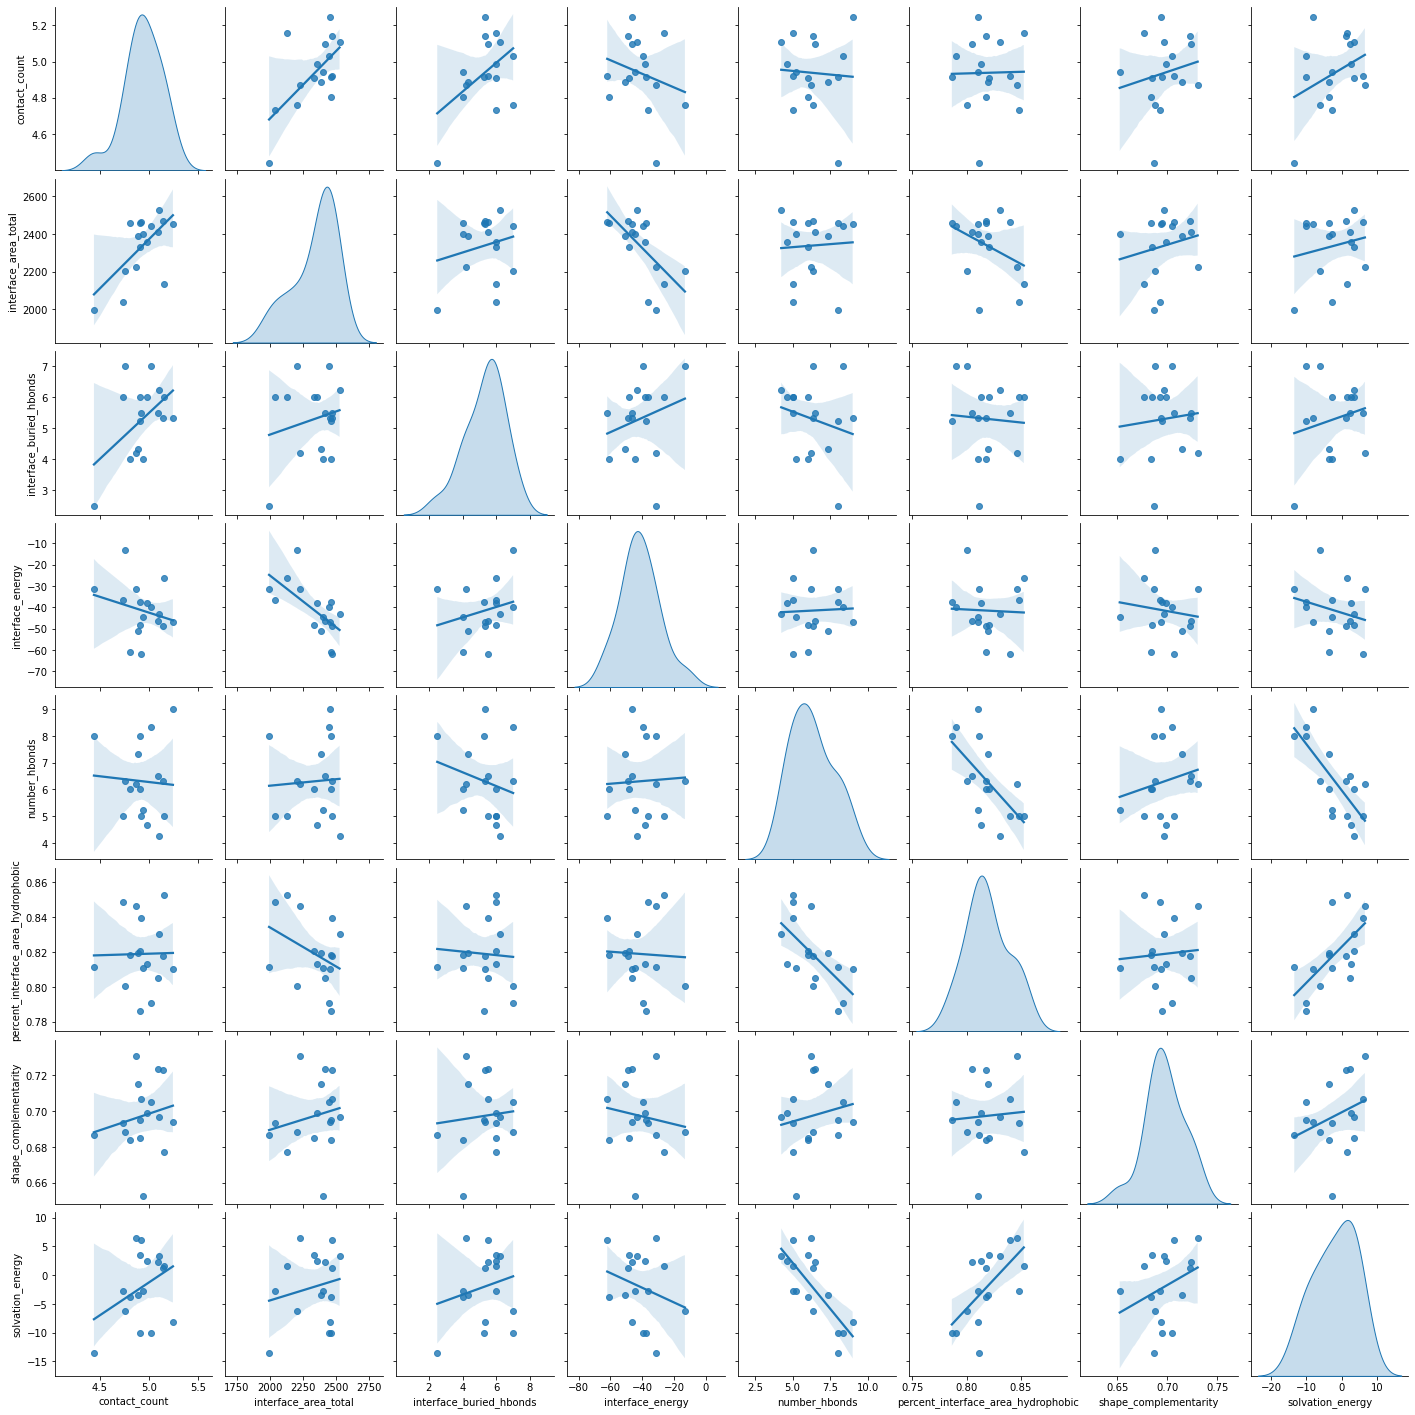

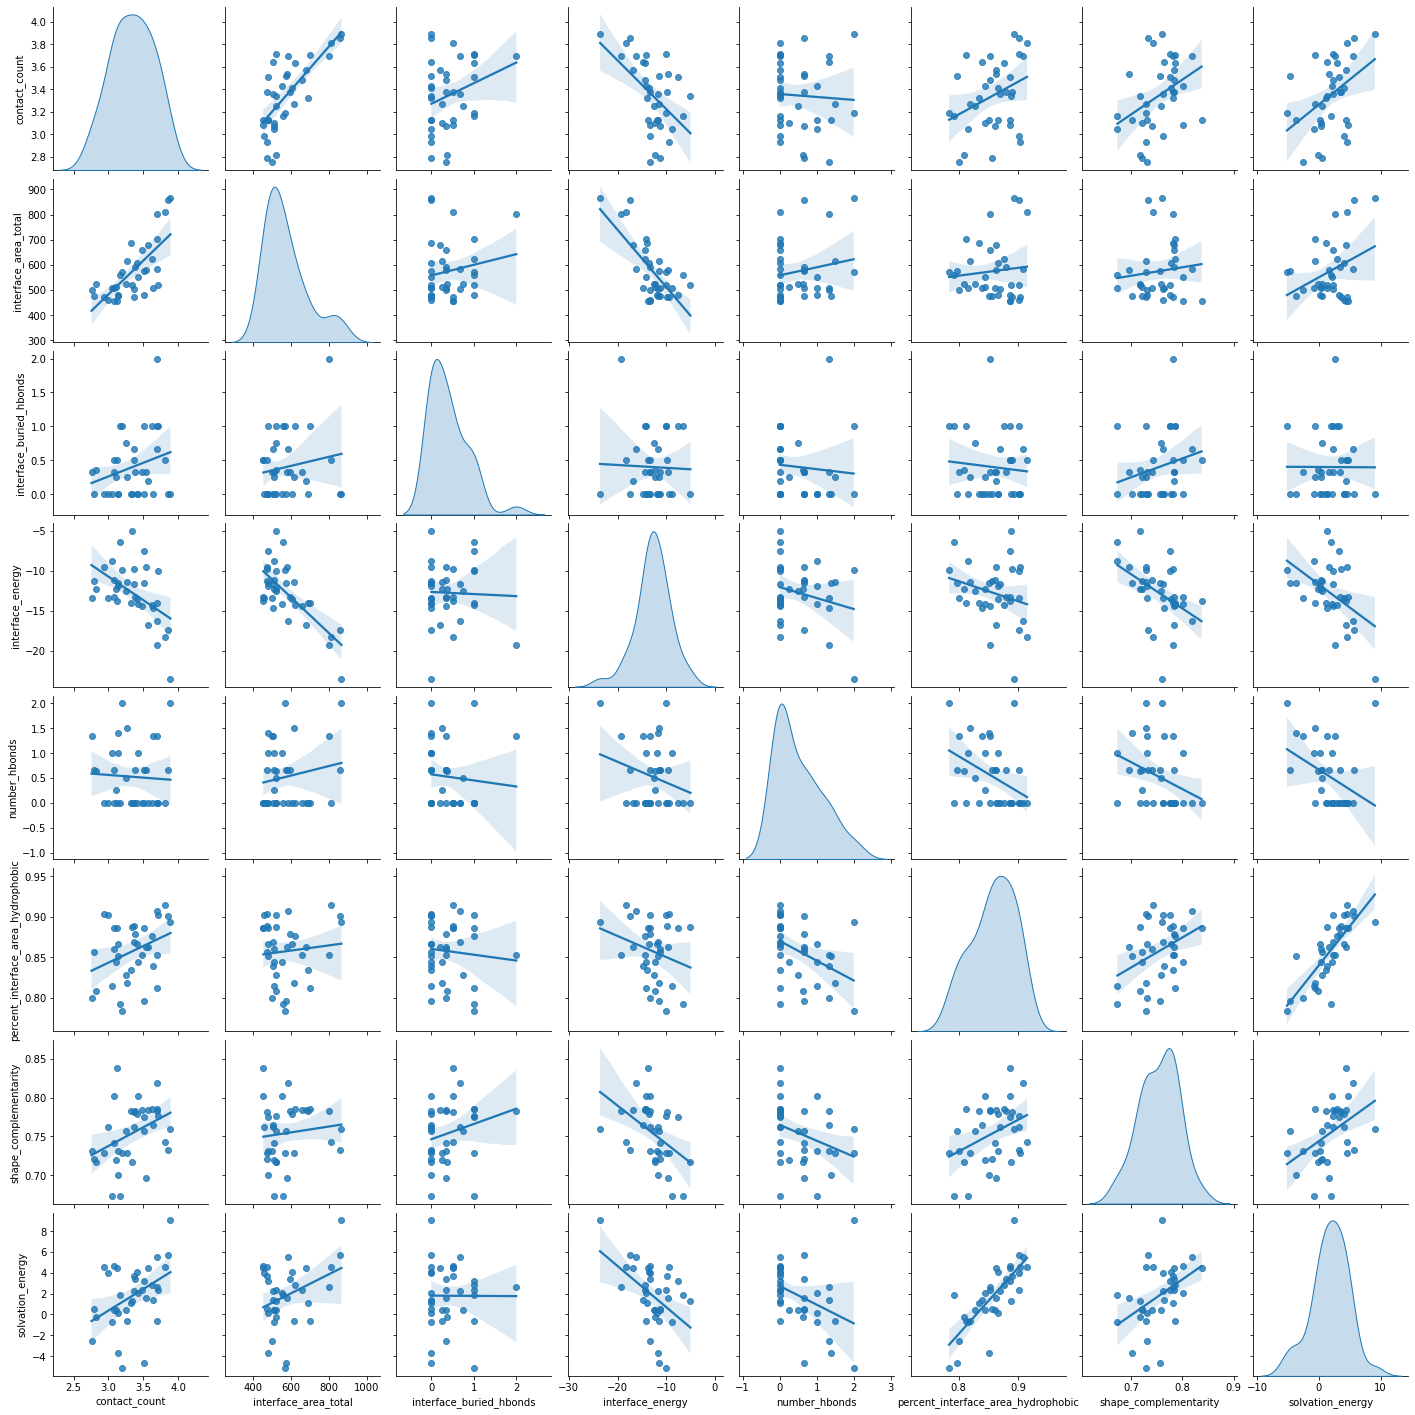

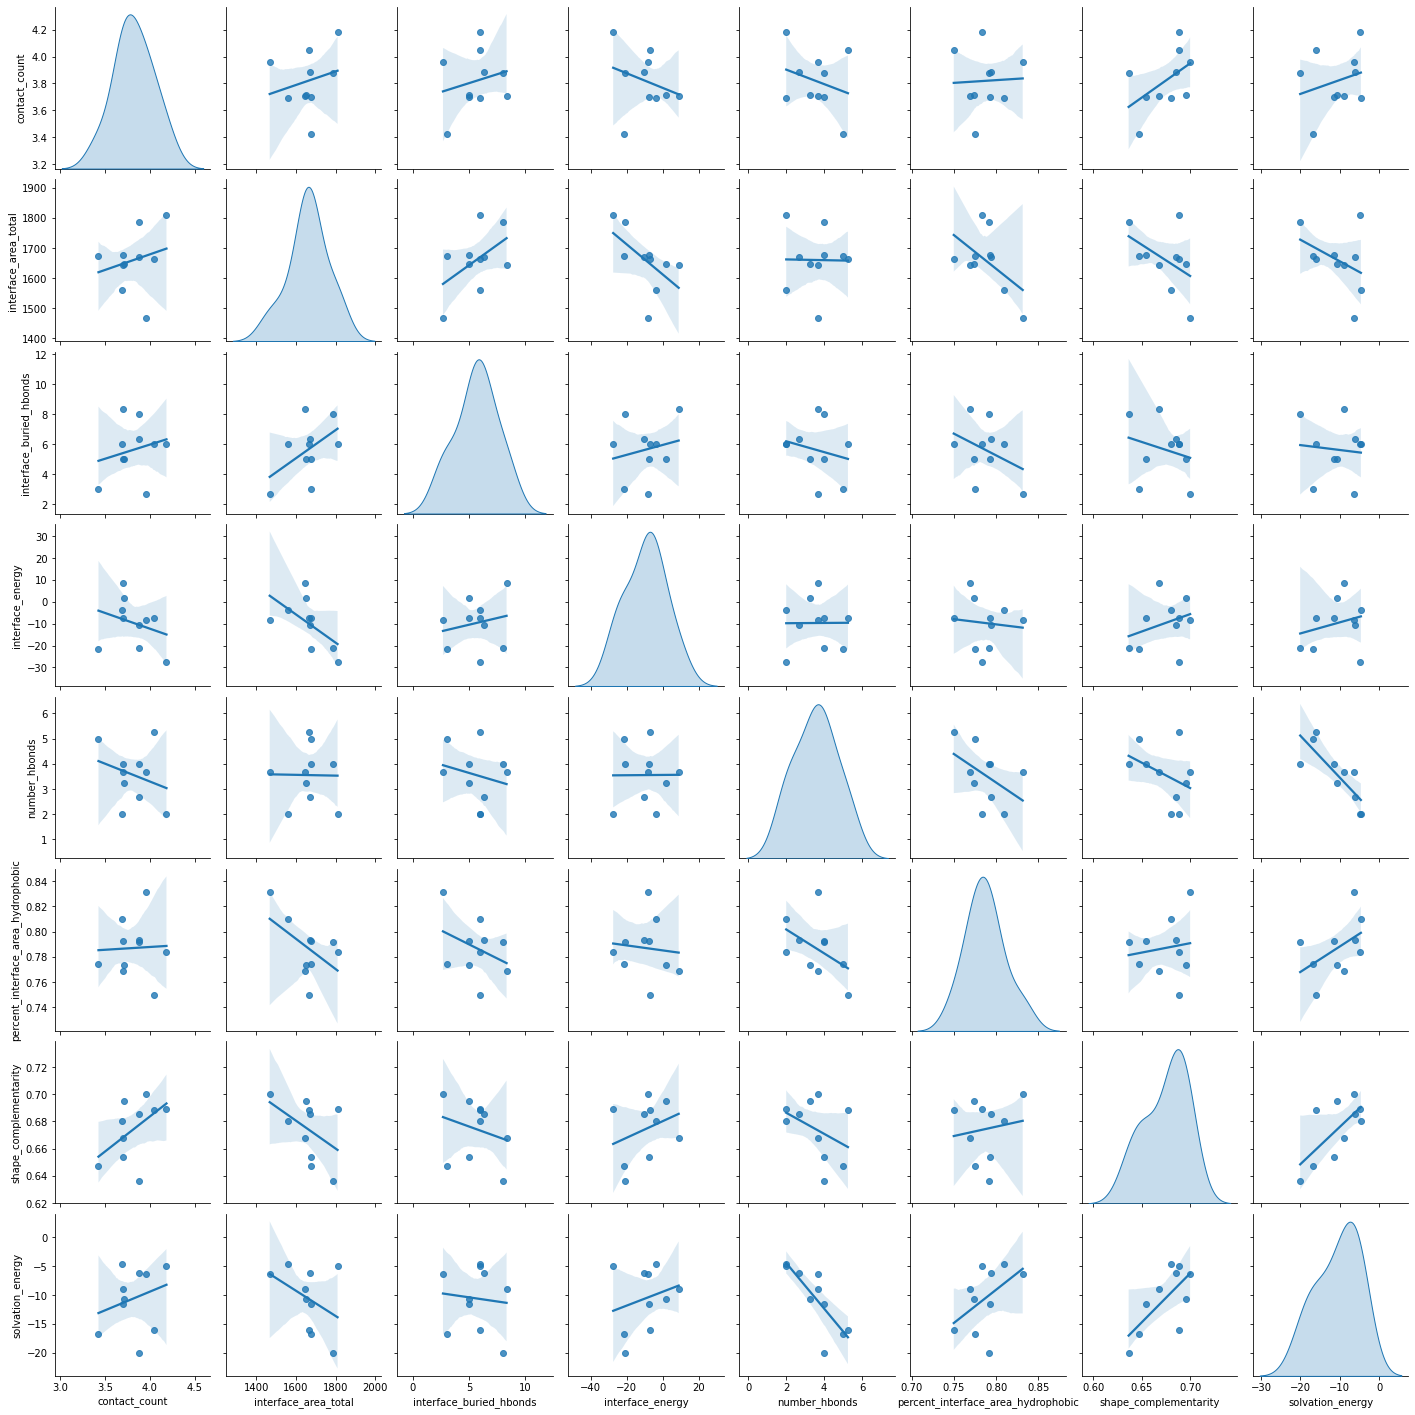

In [95]:
for cluster_members in training_clusters.values():
    _ = sns.pairplot(numerical_trajectory_df.loc[cluster_members, idx_slice['no_constraint', :]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

In [91]:
nanohedra_metrics = ['nanohedra_score_normalized', 'nanohedra_score_center_normalized', 'nanohedra_score',
                     'nanohedra_score_center', 'number_fragment_residues_total', 'number_fragment_residues_center',
                     'multiple_fragment_ratio', 'percent_fragment_helix', 'percent_fragment_strand',
                     'percent_fragment_coil', 'number_of_fragments', 'total_interface_residues',
                     'total_non_fragment_interface_residues', 'percent_residues_fragment_total',
                     'percent_residues_fragment_center']

In [92]:
# I am included this to invert all values in the trajectory_df incase the different objectives
# of the MultiTask regression models are fitting negative/positive values in oposing ways 
# i.e. energy being negative is better, but interface_composition_similarity being positive is better
filter_df = pd.DataFrame(master_metrics)
invert_scale = {'max': 1, 'min': -1, None: None} 

In [305]:
filter_df.loc[:, ['shape_complementarity', 'rmsd', 'interface_energy', 'interface_composition_similarity', 'solvation_energy']]

shape_complementarity  \
description  Measure of fit between two surfaces from Lawre...   
direction                                                  max   
function                                             normalize   
filter                                                    True   

                                                          rmsd  \
description  Root Mean Square Deviation of all CA atoms bet...   
direction                                                  min   
function                                             normalize   
filter                                                    True   

                                              interface_energy  \
description  DeltaG of the complexed and unbound (repacked)...   
direction                                                  min   
function                                                  rank   
filter                                                    True   

                              interface_composition_similarity  \
description  The similarity to the expected interface compo...   
direction                                                  max   
function                                                  rank   
filter                                                    True   

                                              solvation_energy  
description  The free energy resulting from hydration of th...  
direction                                                  min  
function                                                rank\n  
filter                                                    True

In [148]:
inversion_s = pd.Series({(pose_type, metric): invert_scale[filter_df.loc['direction', metric]]
                         for pose_type, metric in trajectory_df.columns})
inversion_trajectory_df = trajectory_df.multiply(inversion_s, axis=1)

In [129]:
display(inversion_trajectory_df)

pose             \
                                    contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      5.014050  45.666667   
...                                           ...        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174      3.346092   9.400000   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197      3.440978  10.050000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174      3.598300   9.650000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176      3.799522  10.700000   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186      3.347400   8.900000   

                                                          \
                                    favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                  ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                  0.0   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                  0.0   

                                                                \
                                    interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  82.489193   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  77.711008   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  84.681658   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  84.972209   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  83.167197   
...                                                        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                  28.257507   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                  26.425943   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                  35.293468   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                  31.365349   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                  28.900070   

                                                                \
                                    interface_area_hydrophobic   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66               -1895.809329   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72               -1931.910503   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89               -1935.288939   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68               -1964.797807   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78               -2096.704980   
...                                                        ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                -657.813212   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                -626.440510   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                -636.154019   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                -676.122591   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                -617.681063   

                                                                               \
                                    interface_area_polar interface_area_total   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66           466.336397          2362.145727   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72           464.734444          2396.644947   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89           497.929604          2433.218544   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68           444.052034          2408.849840   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78           456.410710          2553.115690   
...                                                  ...                  ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174           162.707903         

In [251]:
# scale the data to a standard gaussian distribution selecting the group to scale by each trajectory independently
scaler = StandardScaler()
scaled_np = [pd.DataFrame(scaler.fit_transform(trajectory_df.loc[cluster_members, :]), 
                          index=trajectory_df.loc[cluster_members, :].index)
             for cluster_members in training_clusters.values()]

train_traj_df = pd.concat(scaled_np, keys=list(training_clusters.keys()), axis=0)
train_traj_df.columns = trajectory_df.columns
# repeat the scaling for the inverted DF
inversion_scaled_np = [pd.DataFrame(scaler.fit_transform(inversion_trajectory_df.loc[cluster_members, :]), 
                                    index=inversion_trajectory_df.loc[cluster_members, :].index)
                       for cluster_members in training_clusters.values()]
inv_train_traj_df = pd.concat(inversion_scaled_np, keys=list(training_clusters.keys()), axis=0)
inv_train_traj_df.columns = inversion_trajectory_df.columns

/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site

In [252]:
display(train_traj_df)

pose  \
                                                                        contact_count   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      0.453125   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      0.207194   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      1.036066   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      0.611693   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      0.952909   
...                                                                               ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174     -1.101210   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197     -0.480925   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174      0.547522   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176      1.862951   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186     -1.092662   

                                                                                   \
                                                                             core   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66  0.117828   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.395483   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.762384   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  0.068247   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78  1.010291   
...                                                                           ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174 -0.464294   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197  0.709338   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174 -0.012897   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176  1.882970   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186 -1.367088   

                                                                                              \
                                                                        favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                                                      ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                  0.0   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                  0.0   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                  0.0   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                  0.0   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                  0.0   

                                                                                                    \
                                                                        interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  -0.610940   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                   0.497594   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  -1.119590   
                                    2gtr_2dj6-DEGEN_1_2-RO

In [94]:
display(inv_train_traj_df)

/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site

pose  \
                                                                        contact_count   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      0.453125   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      0.207194   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      1.036066   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      0.611693   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      0.952909   
...                                                                               ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424      -0.186348   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382      -1.815148   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346      -0.520446   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430      -0.376083   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394      -0.027354   

                                                                                   \
                                                                             core   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66  0.117828   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.395483   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.762384   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  0.068247   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78  1.010291   
...                                                                           ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424  -0.351991   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382   0.161329   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346   0.307992   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430   0.601318   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394   0.821312   

                                                                                              \
                                                                        favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                                                      ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                                                          \
                                                                        interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
                            

In [253]:
# select the metrics which the linear model should be trained on. In this case we want the nanohedra_metrics
nano_traj = train_traj_df.loc[:, idx_slice[:, nanohedra_metrics]]
inv_nano_traj = inv_train_traj_df.loc[:, idx_slice[:, nanohedra_metrics]]

In [114]:
display(nano_traj)
display(inv_nano_traj)

pose  \
                                                                        nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                   0.903287   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                   1.237275   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                   1.198917   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                   0.166221   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                   1.281726   
...                                                                                            ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   -0.089068   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   -0.119524   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   -0.419352   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                    0.290579   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   -0.956487   

                                                                                                           \
                                                                        nanohedra_score_center_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                          0.781328   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                          1.346699   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                          1.253394   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                          0.468317   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                          1.337087   
...                                                                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                           0.215160   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                           0.332468   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          -1.001175   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                           0.034227   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          -1.708097   

                                                                                         \
                                                                        nanohedra_score   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        0.900408   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        1.373253   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89        1.318947   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        0.968811   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        1.436184   
...                                                                                 ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         0.579999   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382        -0.250216   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346        -1.331417   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430        -0.603573   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394        -1.437861   

                                                                                                \
                                                                   

pose  \
                                                                        nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                   0.903287   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                   1.237275   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                   1.198917   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                   0.166221   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                   1.281726   
...                                                                                            ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   -0.089068   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   -0.119524   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   -0.419352   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                    0.290579   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   -0.956487   

                                                                                                           \
                                                                        nanohedra_score_center_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                          0.781328   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                          1.346699   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                          1.253394   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                          0.468317   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                          1.337087   
...                                                                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                           0.215160   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                           0.332468   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          -1.001175   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                           0.034227   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          -1.708097   

                                                                                         \
                                                                        nanohedra_score   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        0.900408   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        1.373253   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89        1.318947   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        0.968811   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        1.436184   
...                                                                                 ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         0.579999   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382        -0.250216   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346        -1.331417   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430        -0.603573   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394        -1.437861   

                                                                                                \
                                                                   

In [132]:
# select the Rosetta metrics to train model on
rosetta_metrics = {'shape_complementarity': StandardScaler(),  # I think a gaussian dist is preferable to MixMax
                   'interface_composition_similarity': StandardScaler(),  # gaussian preferable to MixMax
                   'interface_energy': StandardScaler(),  # gaussian preferable to MaxAbsScaler,
                   'rmsd': StandardScaler(),
                   'solvation_energy': StandardScaler()}
# Assign each metric a weight proportional to it's share of the total weight
rosetta_select_metrics = {item: 1 / len(rosetta_metrics) for item in rosetta_metrics}

## Select the oriented DF and the desired metrics for the training

In [298]:
selected_train_traj_df = train_traj_df
selected_nano_traj_df = nano_traj
# selected_train_traj_df = inv_train_traj_df
# selected_nano_traj_df = inv_nano_traj

### Make a dataframe with 2D targets for MultiTask model training

In [299]:
# Have to concatenate the df from the selected columns since they come from different protocols
pose_traj_df = selected_train_traj_df.loc[:, idx_slice['pose', ['interface_composition_similarity', 'rmsd']]]
no_constraint_traj_df = \
    selected_train_traj_df.loc[:, idx_slice['no_constraint',
                                            set(rosetta_metrics.keys()).difference(['interface_composition_similarity', 'rmsd'])]]
targets2d = pd.concat([pose_traj_df, no_constraint_traj_df], axis=1).droplevel(0, axis=1)
targets2d_for_filter = pd.concat([targets2d], keys=[('pose', 'extra')], axis=1).droplevel(0)  # remove index multiaxis, add column extra axis

In [138]:
display(targets2d_for_filter)

pose  \
                                                               extra   
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.618789   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                        -1.022272   
...                                                              ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                         -0.998879   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                          0.579089   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                         -0.174861   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                          0.456079   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                         -0.120475   

                                                                     \
                                                                      
                                         rmsd shape_complementarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66 -0.934476             -0.730435   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.017190             -0.677307   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.044911             -0.197417   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  1.051053              1.383018   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78 -1.774419             -0.023448   
...                                       ...                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424   0.130228              0.699601   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382   0.188793             -1.320135   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346  -1.777435              1.007979   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430  -0.270115             -0.976294   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394  -1.008833              0.275927   

                                                                       
                                                                       
                                    solvation_energy interface_energy  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66         0.302089         1.635334  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        -0.930475         0.574223  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89         1.062687         0.442530  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        -0.550316         0.633082  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        -0.920790         0.144913  
...                                              ...              ...  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         -1.093404         1.690176  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382          1.183335         1.125539  
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346          0.011063        -1.085304  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430          0.176577        -0.208658  
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394         -1.157358        -0.572939  

[64 rows x 5 columns]

# Get the selection weight as a linear combination
## I had to add the sort_df=False parameter as the results were being sorted, thus my splitting was disconnecting my traget from my train

In [301]:
# Weighting scheme inherently standardizes the weights between [0, 1] by taking a linear combination of the metrics
df_plus_target = pd.concat([filter_pose(targets2d_for_filter.loc[cluster_members, :], weight=rosetta_select_metrics, sort_df=False) 
                            for cluster_members in training_clusters.values()])
target = df_plus_target[('pose', 'sum', 'selection_weight')]

[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarity': 0.2, 'interface_energy': 0.2, 'rmsd': 0.2, 'solvation_energy': 0.2}
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarity': 0.2, 'interface_energy': 0.2, 'rmsd': 0.2, 'solvation_energy': 0.2}
[DesignMetrics]-INFO: Number of starting designs = 37
[DesignMetrics]-INFO: Number of starting designs = 37
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarity': 0.2, 'interface_energy': 0.2, 'rmsd': 0.2, 'solvation_energy': 0.2}
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarity': 0.2, 'interface_energy': 0.2, 'rmsd': 0.2, 'solvation_energy': 0.2}
[DesignMetrics]-INFO: Number of starting des

## Here are the new values

In [302]:
df_plus_target

pose  \
                                                 sum   
                                    selection_weight   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66         0.458824   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72         0.341176   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89         0.588235   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68         0.776471   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78         0.329412   
...                                              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174         0.400000   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197         0.485714   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174         0.771429   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176         0.514286   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186         0.628571   

                                                                      \
                                                               extra   
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.618789   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                        -1.022272   
...                                                              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                        -1.149432   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                        -0.560311   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                        -1.034687   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                         1.133847   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                        -0.199927   

                                                                \
                                                                 
                                         rmsd interface_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66  0.934476        -1.635334   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72 -0.017190        -0.574223   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89 -0.044911        -0.442530   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68 -1.051053        -0.633082   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78  1.774419        -0.144913   
...                                       ...              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174  1.028697        -0.320044   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197  0.949876         0.313226   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174 -1.880903        -1.995432   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176  0.654759        -0.166064   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186 -0.491149         0.803911   

                                                                            
                                                                            
                                    shape_complementarity solvation_energy  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66             -0.730435        -0.302089  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72             -0.677307         0.930475  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89             -0.197417        -1.062687  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68              1.383018         0.550316  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78             -0.023448         0.920790  
...                                                   ...              ...  
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174              0.072602         1.356702  
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197             -0.489187        -0.900114  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174              2.136807        -0.145987  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176             -0.766838         1.163268  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186              0.540680        -0.724015  

[368 rows x 6 columns]

### This was using the inverted_df. The issue is with my method of inversion. The min and max parameters are flipping the inverted_df, but the same parameters are weighting the selection. This is causing the selection_weight to be wrong.

In [300]:
df_plus_target

pose  \
                                                 sum   
                                    selection_weight   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66         0.364706   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72         0.435294   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89         0.400000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68         0.517647   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78         0.611765   
...                                              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174         0.628571   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197         0.542857   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174         0.428571   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176         0.628571   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186         0.628571   

                                                                      \
                                                               extra   
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.618789   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                        -1.022272   
...                                                              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                        -1.149432   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                        -0.560311   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                        -1.034687   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                         1.133847   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186                        -0.199927   

                                                                \
                                                                 
                                         rmsd interface_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66 -0.934476         1.635334   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.017190         0.574223   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.044911         0.442530   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  1.051053         0.633082   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78 -1.774419         0.144913   
...                                       ...              ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174 -1.028697         0.320044   
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197 -0.949876        -0.313226   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174  1.880903         1.995432   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 -0.654759         0.166064   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186  0.491149        -0.803911   

                                                                            
                                                                            
                                    shape_complementarity solvation_energy  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66             -0.730435         0.302089  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72             -0.677307        -0.930475  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89             -0.197417         1.062687  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68              1.383018        -0.550316  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78             -0.023448        -0.920790  
...                                                   ...              ...  
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174              0.072602        -1.356702  
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197             -0.489187         0.900114  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174              2.136807         0.145987  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176             -0.766838        -1.163268  
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186              0.540680         0.724015  

[368 rows x 6 columns]

### NEW Using StandardScaler() on the selection_weight

In [307]:
target

2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66    0.458824
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72    0.341176
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89    0.588235
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68    0.776471
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78    0.329412
                                         ...   
4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174    0.400000
4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197    0.485714
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174    0.771429
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176    0.514286
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_186    0.628571
Name: (pose, sum, selection_weight), Length: 368, dtype: float64

In [308]:
scaled_target_correct = [scaler.fit_transform(target[cluster_members].values.reshape(-1, 1)) for cluster_members in training_clusters.values()]
# scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

In [309]:
scaled_target_flat = []
for cluster, cluster_members in zip(scaled_target_correct, training_clusters.values()):
    # to test for the correct values associated with the correct index
    # display(cluster)
    # display(target[cluster_members].values)
    scaled_target_flat.extend(cluster.tolist())

In [310]:
scaled_target_correct = np.array(scaled_target_flat) # [:, None]

In [263]:
scaled_target_correct

array([[-1.23857579],
       [-0.70775759],
       [-0.97316669],
       [-0.0884697 ],
       [ 0.61928789],
       [-0.1769394 ],
       [ 1.41551519],
       [-0.97316669],
       [-0.61928789],
       [-0.0884697 ],
       [-0.0884697 ],
       [ 1.23857579],
       [-0.1769394 ],
       [-0.79622729],
       [ 0.70775759],
       [-0.70775759],
       [ 2.65409097],
       [-0.68325112],
       [-0.86305405],
       [-0.32364527],
       [-1.33054166],
       [-1.29458108],
       [ 0.71921171],
       [ 0.82709347],
       [ 0.71921171],
       [ 0.61132995],
       [ 0.2517241 ],
       [-1.43842342],
       [-1.7261081 ],
       [ 0.2517241 ],
       [ 0.61132995],
       [ 1.54630518],
       [ 0.93497522],
       [ 0.75517229],
       [ 0.57536937],
       [-2.19359571],
       [-1.25862049],
       [ 0.21576351],
       [-0.61132995],
       [ 0.61132995],
       [-0.03596059],
       [ 0.5034482 ],
       [-0.17980293],
       [-1.43842342],
       [ 0.82709347],
       [ 0

## Visualizing the scaling for individual trajectories

In [209]:
# display(target)
start_idx = 0
for cluster_members in training_clusters.values():
    members_length = len(cluster_members)
    display(scaled_target.ravel()[start_idx: start_idx + members_length])
    display(scaled_target_correct.ravel()[start_idx: start_idx + members_length])
    display(target.ravel()[start_idx: start_idx + members_length])
    start_idx += members_length
# display(scaled_target)  #.ravel()) <- to convert the data to a 1D array

array([ 2.59305108,  1.3792042 ,  1.2057975 ,  0.68557741,  0.59887406,
       -0.09475273, -0.09475273, -0.09475273, -0.18145608, -0.18145608,
       -0.61497282, -0.70167617, -0.70167617, -0.78837952, -0.96178622,
       -0.96178622, -1.22189626])

array([-1.23857579, -0.70775759, -0.97316669, -0.0884697 ,  0.61928789,
       -0.1769394 ,  1.41551519, -0.97316669, -0.61928789, -0.0884697 ,
       -0.0884697 ,  1.23857579, -0.1769394 , -0.79622729,  0.70775759,
       -0.70775759,  2.65409097])

array([0.36470588, 0.43529412, 0.4       , 0.51764706, 0.61176471,
       0.50588235, 0.71764706, 0.4       , 0.44705882, 0.51764706,
       0.51764706, 0.69411765, 0.50588235, 0.42352941, 0.62352941,
       0.43529412, 0.88235294])

array([ 1.5877609 ,  1.34874086,  1.06988414,  0.95037412,  0.91053745,
        0.87070077,  0.87070077,  0.79102743,  0.79102743,  0.71135408,
        0.6715174 ,  0.6715174 ,  0.55200738,  0.55200738,  0.55200738,
        0.51217071,  0.43249736,  0.31298734,  0.27315067,  0.15364065,
        0.15364065,  0.11380397, -0.16505274, -0.32439944, -0.48374613,
       -0.64309283, -0.80243952, -0.88211287, -1.08129624, -1.51949965,
       -1.55933632, -1.599173  , -1.71868302, -1.71868302, -2.03737641,
       -2.39590647, -2.55525317])

array([-0.68325112, -0.86305405, -0.32364527, -1.33054166, -1.29458108,
        0.71921171,  0.82709347,  0.71921171,  0.61132995,  0.2517241 ,
       -1.43842342, -1.7261081 ,  0.2517241 ,  0.61132995,  1.54630518,
        0.93497522,  0.75517229,  0.57536937, -2.19359571, -1.25862049,
        0.21576351, -0.61132995,  0.61132995, -0.03596059,  0.5034482 ,
       -0.17980293, -1.43842342,  0.82709347,  0.39556644,  1.33054166,
        0.97093581, -0.46748761, -2.04975337,  0.89901464,  0.35960585,
        1.07881756,  0.89901464])

array([0.41081081, 0.38378378, 0.46486486, 0.31351351, 0.31891892,
       0.62162162, 0.63783784, 0.62162162, 0.60540541, 0.55135135,
       0.2972973 , 0.25405405, 0.55135135, 0.60540541, 0.74594595,
       0.65405405, 0.62702703, 0.6       , 0.18378378, 0.32432432,
       0.54594595, 0.42162162, 0.60540541, 0.50810811, 0.58918919,
       0.48648649, 0.2972973 , 0.63783784, 0.57297297, 0.71351351,
       0.65945946, 0.44324324, 0.20540541, 0.64864865, 0.56756757,
       0.67567568, 0.64864865])

array([ 1.98612764,  1.54394056,  1.54394056,  0.95435779,  0.06998363,
        0.06998363, -0.22480775, -0.66699483, -1.10918191, -2.73053453])

array([-2.10703101, -0.5942908 , -0.27013218,  0.5942908 ,  1.35066091,
       -0.05402644, -0.91844942,  1.02650229, -0.05402644,  1.02650229])

array([0.16, 0.44, 0.5 , 0.66, 0.8 , 0.54, 0.38, 0.74, 0.54, 0.74])

array([ 1.7650341 ,  1.65448733,  1.47024271,  1.43339379,  1.17545133,
        1.10175348,  1.02805563,  1.02805563,  0.84381102,  0.8069621 ,
        0.8069621 ,  0.6595664 ,  0.47532179,  0.47532179,  0.36477502,
        0.25422825,  0.21737932,  0.1805304 ,  0.1805304 ,  0.10683255,
        0.06998363, -0.00371422, -0.22480775, -0.26165668, -0.26165668,
       -0.33535452, -0.66699483, -0.70384376, -0.85123945, -1.14603083,
       -1.2565776 , -1.36712437, -1.4039733 , -1.44082222, -1.47767114,
       -1.66191576, -1.66191576, -1.84616038, -2.39889422, -2.43574315])

array([-0.08168234, -1.19256213,  0.27771995,  1.42127267,  0.21237408,
        1.38859974,  1.58463735,  0.17970114, -1.3559268 , -2.0093855 ,
        1.15988919, -1.15988919,  0.44108462,  0.53910343,  1.02919745,
        1.09454332, -0.63712223, -0.99652452,  0.31039288, -0.47375756,
        1.68265615, -2.04205844, -0.17970114, -1.51929148, -1.09454332,
       -0.50643049,  0.53910343,  0.11435527,  0.86583278,  0.83315984,
       -1.12721626,  1.02919745,  0.27771995,  0.34306582,  0.7024681 ,
       -0.11435527,  0.83315984, -0.89850571, -1.3559268 , -0.11435527])

array([0.5  , 0.33 , 0.555, 0.73 , 0.545, 0.725, 0.755, 0.54 , 0.305,
       0.205, 0.69 , 0.335, 0.58 , 0.595, 0.67 , 0.68 , 0.415, 0.36 ,
       0.56 , 0.44 , 0.77 , 0.2  , 0.485, 0.28 , 0.345, 0.435, 0.595,
       0.53 , 0.645, 0.64 , 0.34 , 0.67 , 0.555, 0.565, 0.62 , 0.495,
       0.64 , 0.375, 0.305, 0.495])

array([ 2.28091902,  0.51217071,  0.51217071,  0.51217071,  0.51217071,
        0.21737932, -0.22480775, -0.51959914, -0.96178622, -1.4039733 ])

array([ 0.38191314,  0.07638263,  0.38191314, -0.38191314, -0.68744364,
        0.38191314, -1.60403517, -1.14573941,  2.21509618,  0.38191314])

array([0.6 , 0.56, 0.6 , 0.5 , 0.46, 0.6 , 0.34, 0.4 , 0.84, 0.6 ])

array([ 1.98612764,  1.04815505,  0.91415896,  0.51217071,  0.11018246,
       -0.02381363, -0.15780971, -0.2918058 , -0.42580188, -1.22977839,
       -1.22977839])

array([-0.29088724, -0.58177447,  0.43633086,  0.87266171,  1.01810533,
       -0.14544362,  2.03621066, -1.45443618,  0.        , -0.43633086,
       -1.45443618])

array([0.50909091, 0.47272727, 0.6       , 0.65454545, 0.67272727,
       0.52727273, 0.8       , 0.36363636, 0.54545455, 0.49090909,
       0.36363636])

array([ 1.77556236,  1.14386654,  0.72273599,  0.30160543,  0.09104016,
       -0.54065567, -1.38291677])

array([-0.21602469,  0.86409876,  0.43204938,  0.        ,  1.51217283,
       -0.86409876, -1.72819752])

array([0.54285714, 0.68571429, 0.62857143, 0.57142857, 0.77142857,
       0.45714286, 0.34285714])

array([ 1.47694252,  1.39654487,  1.1285527 ,  0.99455661,  0.9677574 ,
        0.91415896,  0.8069621 ,  0.8069621 ,  0.75336366,  0.72656444,
        0.67296601,  0.64616679,  0.51217071,  0.45857228,  0.45857228,
        0.43177306,  0.40497384,  0.37817463,  0.35137541,  0.32457619,
        0.27097776,  0.16378089,  0.13698167,  0.11018246,  0.08338324,
        0.05658402, -0.1310105 , -0.15780971, -0.21140815, -0.21140815,
       -0.34540423, -0.37220345, -0.37220345, -0.39900266, -0.39900266,
       -0.47940031, -0.58659718, -0.64019562, -0.66699483, -0.80099092,
       -0.80099092, -0.88138857, -0.88138857, -0.934987  , -0.96178622,
       -1.01538465, -1.06898309, -1.0957823 , -1.14938074, -1.2565776 ,
       -1.39057369, -1.63176664, -1.63176664, -1.76576273, -1.87295959])

array([ 1.53387302,  0.7988922 ,  1.34213889,  0.63911376,  0.73498082,
        1.15040476,  0.73498082, -0.06391138, -0.2556455 ,  0.38346825,
        0.03195569,  1.37409458,  0.28760119, -0.76693651, -0.57520238,
       -0.60715807,  0.35151257, -0.86280357,  0.70302513, -0.28760119,
       -0.06391138, -1.08649339,  0.60715807, -0.22368981,  0.67106944,
       -0.76693651, -0.51129101, -1.91734127,  0.31955688, -1.11844907,
        1.8534299 ,  0.        ,  0.51129101, -1.3101832 ,  0.99062632,
       -1.75756283, -0.38346825, -1.18236045, -2.04516402, -1.75756283,
       -0.28760119,  1.27822751,  1.0545377 , -0.95867064, -1.46996164,
        0.95867064,  1.94929696,  1.08649339, -0.92671495, -1.02258201,
        0.57520238, -0.86280357,  1.15040476,  0.2556455 , -0.2556455 ])

array([0.68363636, 0.6       , 0.66181818, 0.58181818, 0.59272727,
       0.64      , 0.59272727, 0.50181818, 0.48      , 0.55272727,
       0.51272727, 0.66545455, 0.54181818, 0.42181818, 0.44363636,
       0.44      , 0.54909091, 0.41090909, 0.58909091, 0.47636364,
       0.50181818, 0.38545455, 0.57818182, 0.48363636, 0.58545455,
       0.42181818, 0.45090909, 0.29090909, 0.54545455, 0.38181818,
       0.72      , 0.50909091, 0.56727273, 0.36      , 0.62181818,
       0.30909091, 0.46545455, 0.37454545, 0.27636364, 0.30909091,
       0.47636364, 0.65454545, 0.62909091, 0.4       , 0.34181818,
       0.61818182, 0.73090909, 0.63272727, 0.40363636, 0.39272727,
       0.57454545, 0.41090909, 0.64      , 0.53818182, 0.48      ])

array([ 1.79218594,  1.24914917,  0.86126577,  0.82247743,  0.78368909,
        0.66732407,  0.51217071,  0.47338237,  0.24065233,  0.20186399,
        0.20186399,  0.20186399,  0.12428731,  0.08549897,  0.04671063,
       -0.03086605, -0.03086605, -0.06965439, -0.06965439, -0.18601941,
       -0.22480775, -0.26359609, -0.26359609, -0.30238443, -0.37996112,
       -0.37996112, -0.61269116, -0.6514795 , -0.6514795 , -0.76784452,
       -0.76784452, -0.80663286, -0.96178622, -0.96178622, -1.07815124,
       -1.11693958, -1.2333046 , -1.31088128])

array([-1.58478208, -0.91750541,  0.86189903, -0.69507986, -1.41796291,
       -1.19553736,  0.4726543 ,  1.30675013,  2.75251624,  0.4726543 ,
       -0.36144153, -0.13901597, -0.19462236,  1.41796291,  0.13901597,
       -0.91750541, -0.19462236,  0.08340958,  1.36235652,  0.08340958,
        0.25022875, -0.08340958,  0.91750541, -0.9731118 ,  0.30583514,
       -1.69599486, -0.75068625,  0.4726543 , -0.75068625,  1.9740268 ,
       -1.36235652,  0.13901597,  0.52826069, -0.25022875,  1.13993097,
        0.36144153, -0.36144153, -1.19553736])

array([0.36315789, 0.42631579, 0.59473684, 0.44736842, 0.37894737,
       0.4       , 0.55789474, 0.63684211, 0.77368421, 0.55789474,
       0.47894737, 0.5       , 0.49473684, 0.64736842, 0.52631579,
       0.42631579, 0.49473684, 0.52105263, 0.64210526, 0.52105263,
       0.53684211, 0.50526316, 0.6       , 0.42105263, 0.54210526,
       0.35263158, 0.44210526, 0.55789474, 0.44210526, 0.7       ,
       0.38421053, 0.52631579, 0.56315789, 0.48947368, 0.62105263,
       0.54736842, 0.47894737, 0.4       ])

array([2.47744661, 0.51217071, 0.02085173])

array([-0.9258201 , -0.46291005,  1.38873015])

array([0.53333333, 0.6       , 0.86666667])

array([ 1.67027973,  1.14386654,  1.0385839 ,  1.0385839 ,  0.72273599,
        0.40688807,  0.09104016, -0.01424248, -0.22480775, -0.33009039,
       -0.54065567, -1.27763413, -1.27763413, -1.90932996])

array([ 0.67727758,  0.98986724, -1.9276362 , -0.57308103, -1.30245689,
       -0.26049138,  0.98986724, -0.36468793,  0.36468793, -1.30245689,
        1.09406379,  0.05209828, -0.05209828,  1.61504654])

array([0.62857143, 0.67142857, 0.27142857, 0.45714286, 0.35714286,
       0.5       , 0.67142857, 0.48571429, 0.58571429, 0.35714286,
       0.68571429, 0.54285714, 0.52857143, 0.75714286])

array([ 1.74046815,  1.00348969,  0.88065994,  0.81924507,  0.69641533,
        0.69641533,  0.63500045,  0.57358558,  0.57358558,  0.32792609,
        0.32792609,  0.08226661, -0.04056314, -0.10197801, -0.47046724,
       -0.53188211, -0.59329699, -0.90037135, -0.96178622, -0.96178622,
       -1.08461596, -1.33027545, -1.45310519, -1.63734981])

array([-1.14246826, -0.58854425, -1.41943026, -0.45006325, -0.51930375,
        0.45006325,  0.79626576,  0.17310125, -1.00398726, -0.93474676,
       -1.00398726, -1.76563276, -0.03462025,  0.03462025,  0.86550626,
        0.45006325,  1.00398726,  0.72702525, -1.55791126,  1.07322776,
        1.21170876,  0.86550626,  0.72702525,  2.04259476])

array([0.38333333, 0.45      , 0.35      , 0.46666667, 0.45833333,
       0.575     , 0.61666667, 0.54166667, 0.4       , 0.40833333,
       0.4       , 0.30833333, 0.51666667, 0.525     , 0.625     ,
       0.575     , 0.64166667, 0.60833333, 0.33333333, 0.65      ,
       0.66666667, 0.625     , 0.60833333, 0.76666667])

array([ 2.57571041,  1.54394056,  0.51217071,  0.21737932,  0.06998363,
       -0.37220345, -0.37220345, -0.51959914, -1.10918191, -1.10918191])

array([-0.06690498,  2.20786419, -0.46833483,  0.33452488, -1.13738458,
        1.27119453,  0.06690498, -0.46833483, -0.60214478, -1.13738458])

array([0.54, 0.88, 0.48, 0.6 , 0.38, 0.74, 0.56, 0.48, 0.46, 0.38])

array([ 1.49480866,  1.37197892,  1.12631943,  1.12631943,  0.88065994,
        0.14368148,  0.02085173, -0.10197801, -0.71612673, -0.83895647,
       -1.45310519, -2.06725392])

array([-0.71454462, -1.37412427,  1.26419433, -0.16489491, -0.82447456,
        1.15426439,  0.05496497, -1.92377398,  0.93440451, -0.05496497,
        0.93440451,  0.71454462])

array([0.43333333, 0.33333333, 0.73333333, 0.51666667, 0.41666667,
       0.71666667, 0.55      , 0.25      , 0.68333333, 0.53333333,
       0.68333333, 0.65      ])

array([ 2.14990063,  1.82235465,  1.16726268,  0.83971669,  0.34839772,
       -0.63424023, -0.63424023, -1.45310519, -1.94442417])

array([-0.60436722, -0.60436722, -1.57135478, -1.20873445,  1.20873445,
        0.72524067,  1.45048134,  0.12087344,  0.48349378])

array([0.44444444, 0.44444444, 0.26666667, 0.33333333, 0.77777778,
       0.68888889, 0.82222222, 0.57777778, 0.64444444])

array([ 1.80188302,  1.06490456,  0.88065994,  0.69641533,  0.51217071,
       -0.22480775, -0.96178622, -1.8830093 ])

array([-1.89700803, -0.41239305,  0.74230749,  0.57735027, -1.07222193,
        0.41239305,  1.40213637,  0.24743583])

array([0.275, 0.5  , 0.675, 0.65 , 0.4  , 0.625, 0.775, 0.6  ])

array([ 1.88786384,  1.88786384,  1.59307246,  1.39654487,  0.41390691,
        0.31564312, -0.27393965, -0.27393965, -0.27393965, -0.47046724,
       -0.86352242, -0.96178622, -1.06005001, -1.15831381, -1.84616038])

array([-1.62209597,  1.36597555, -0.76836125, -1.02448167,  0.25612042,
       -0.25612042, -0.25612042, -0.42686736, -0.85373472, -0.93910819,
        1.62209597, -0.25612042,  1.19522861,  1.62209597,  0.34149389])

array([0.28      , 0.74666667, 0.41333333, 0.37333333, 0.57333333,
       0.49333333, 0.49333333, 0.46666667, 0.4       , 0.38666667,
       0.78666667, 0.49333333, 0.72      , 0.78666667, 0.58666667])

array([ 1.98612764,  1.4501433 ,  0.78016288,  0.64616679,  0.37817463,
        0.37817463, -0.02381363, -0.82779013, -0.96178622, -1.0957823 ,
       -1.49777056])

array([-0.12681432, -1.14132887,  0.25362864, -1.01451455, -0.88770023,
        0.63407159, -1.52177182,  1.26814318,  0.50725727,  1.77540046,
        0.25362864])

array([0.52727273, 0.38181818, 0.58181818, 0.4       , 0.41818182,
       0.63636364, 0.32727273, 0.72727273, 0.61818182, 0.8       ,
       0.58181818])

array([ 1.45971445,  1.24914917,  1.14386654,  0.72273599,  0.51217071,
        0.30160543,  0.1963228 , -0.11952512, -0.33009039, -0.54065567,
       -0.54065567, -0.64593831, -0.75122094, -2.11989523])

array([-0.39675138, -2.32382951,  1.30361167, -0.62346645, -0.85018153,
        0.73682399,  1.19025414, -0.17003631,  0.51010892,  0.17003631,
       -0.62346645, -0.73682399,  1.53032675,  0.28339384])

array([0.48571429, 0.24285714, 0.7       , 0.45714286, 0.42857143,
       0.62857143, 0.68571429, 0.51428571, 0.6       , 0.55714286,
       0.45714286, 0.44285714, 0.72857143, 0.57142857])

array([ 1.16726268,  0.6759437 ,  0.51217071,  0.34839772,  0.02085173,
       -0.14292126, -0.14292126, -0.30669425, -0.47046724])

array([ 0.98198051,  0.32732684, -0.98198051, -1.30930734, -0.65465367,
       -0.65465367,  1.96396101, -0.32732684,  0.65465367])

array([0.62222222, 0.57777778, 0.48888889, 0.46666667, 0.51111111,
       0.51111111, 0.68888889, 0.53333333, 0.6       ])

array([ 1.74046815,  1.49480866,  0.7578302 ,  0.51217071, -0.47046724,
       -1.69876468])

array([ 0.31333978,  0.94001934,  1.14891253,  0.10444659, -1.77559209,
       -0.73112616])

array([0.63333333, 0.73333333, 0.76666667, 0.6       , 0.3       ,
       0.46666667])

array([ 1.10175348,  1.10175348,  0.95435779,  0.6595664 ,  0.06998363,
       -0.07741206, -0.07741206, -0.51959914, -0.51959914, -1.2565776 ])

array([ 1.07349008, -0.09759001,  1.26867009, -0.87831007, -1.85421014,
       -0.29277002,  1.26867009, -0.87831007, -0.29277002,  0.68313005])

array([0.66, 0.54, 0.68, 0.46, 0.36, 0.52, 0.68, 0.46, 0.52, 0.62])

array([ 0.72273599,  0.72273599,  0.72273599,  0.51217071,  0.09104016,
        0.09104016, -0.75122094])

array([-0.41833001,  0.41833001,  0.83666003, -0.41833001, -2.09165007,
        0.83666003,  0.83666003])

array([0.54285714, 0.6       , 0.62857143, 0.54285714, 0.42857143,
       0.62857143, 0.62857143])

### finding the values where interface energy was calculated improperly

In [141]:
# (numerical_trajectory_df.loc[:, idx_slice['no_constraint', 'interface_energy']] < -100)
numerical_trajectory_df.sort_values(('no_constraint', 'interface_energy'))

pose             \
                                     contact_count       core   
3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184      1.787927   2.333333   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208       4.340683  29.050000   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219       4.246907  29.111111   
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284       4.255956  21.666667   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195       4.243989  29.200000   
...                                            ...        ...   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346        3.761460  33.000000   
3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129      3.809598  12.300000   
3pac_1zoi-DEGEN_1_1-ROT_9_22-tx_268       3.853011   9.750000   
3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_108      4.181294   9.750000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446        3.752652  31.500000   

                                                           \
                                     favor_residue_energy   
3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184                  0.0   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208                   0.0   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219                   0.0   
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284                   0.0   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195                   0.0   
...                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                    0.0   
3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129                  0.0   
3pac_1zoi-DEGEN_1_1-ROT_9_22-tx_268                   0.0   
3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_108                  0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446                    0.0   

                                                                 \
                                     interaction_energy_complex   
3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184                   1.280923   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208                  -87.953261   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219                  -79.621166   
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284                  -74.713984   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195                  -79.480999   
...                                                         ...   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   -48.906503   
3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129                 -24.691878   
3pac_1zoi-DEGEN_1_1-ROT_9_22-tx_268                  -19.313121   
3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_108                 -28.540992   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446                   -53.605154   

                                                                 \
                                     interface_area_hydrophobic   
3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184                 309.577852   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208                 1759.921683   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219                 1748.251612   
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284                 1507.417844   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195                 1694.892725   
...                                                         ...   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                  1287.568866   
3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129                 771.065835   
3pac_1zoi-DEGEN_1_1-ROT_9_22-tx_268                  632.766232   
3pac_1zoi-DEGEN_1_1-ROT_36_36-tx_108                 684.887043   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446                  1297.043266   

                                                           \
                                     interface_area_polar   
3pac_1zoi-DEGEN_1_1-ROT_11_36-tx_184           113.804659   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_208            469.995719   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_219            479.631820   
3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_284            365.795736   
3pac_1zoi-DEGEN_1_1-ROT_22_9-tx_195            460.813649   
...                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346             367.806679   
3pac_1zoi-DEGEN_1_1-ROT_14_35-tx_129           192.219568   
3pac_1zoi-DEGEN_1_1-ROT_9_22-tx_268            100.6

## Comparing distribution of the selection metric with Rosetta metrics

In [264]:
# for cluster_members in training_clusters.values():
target_and_numerical_trajectory_df = numerical_trajectory_df.copy()
target_and_numerical_trajectory_df[('no_constraint', 'target_weighted_sum')] = target
target_and_numerical_trajectory_df[('pose', 'target_weighted_sum')] = target

# target_and_numerical_trajectory_df = pd.concat([numerical_trajectory_df, target], axis=1)

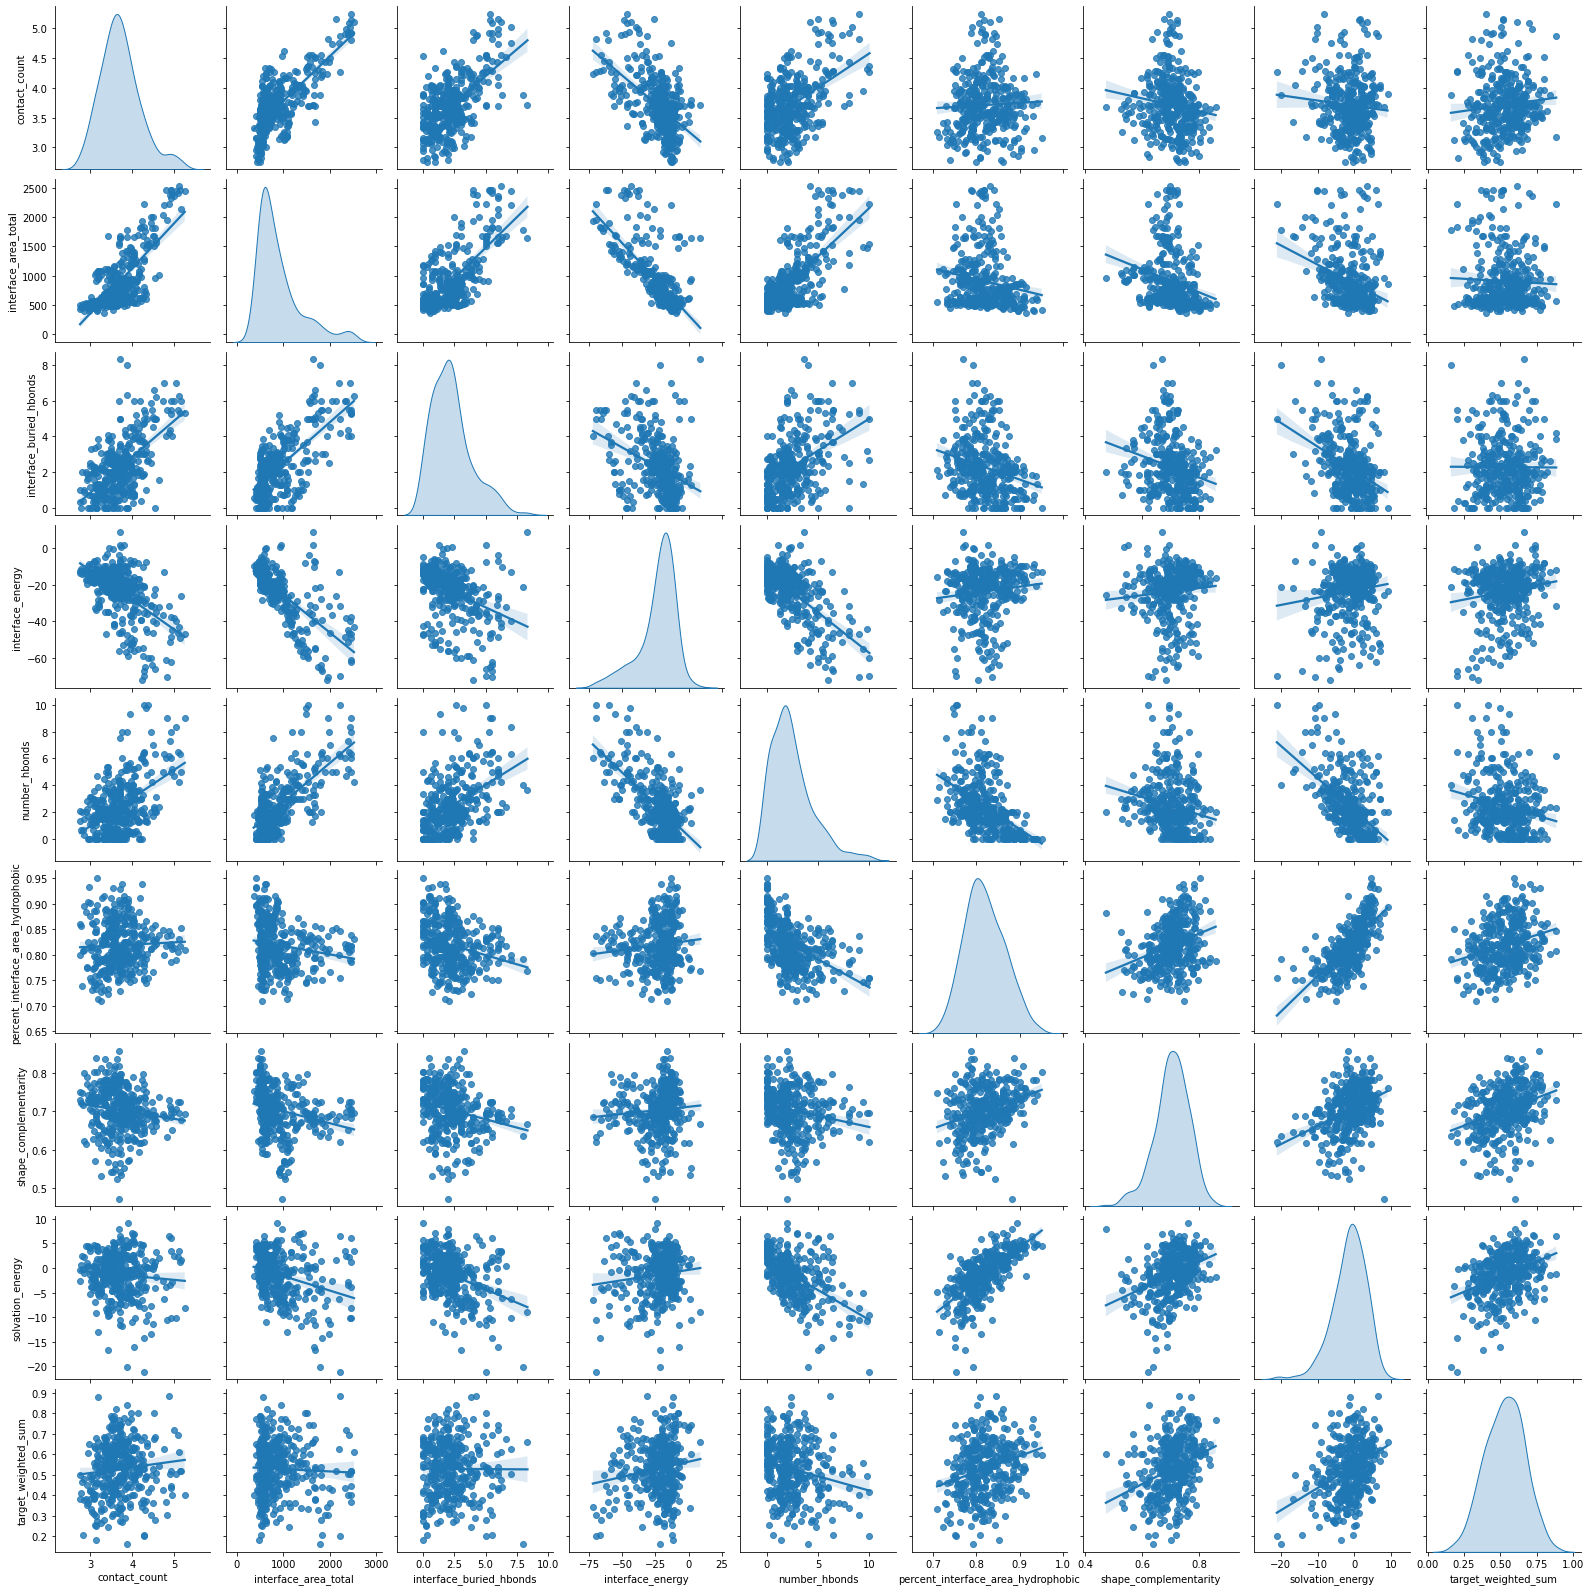

In [265]:
_ = sns.pairplot(target_and_numerical_trajectory_df.loc[df_plus_target.index, idx_slice['no_constraint', :]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

## Comparing distribution of the selection metric with Nanohedra metrics

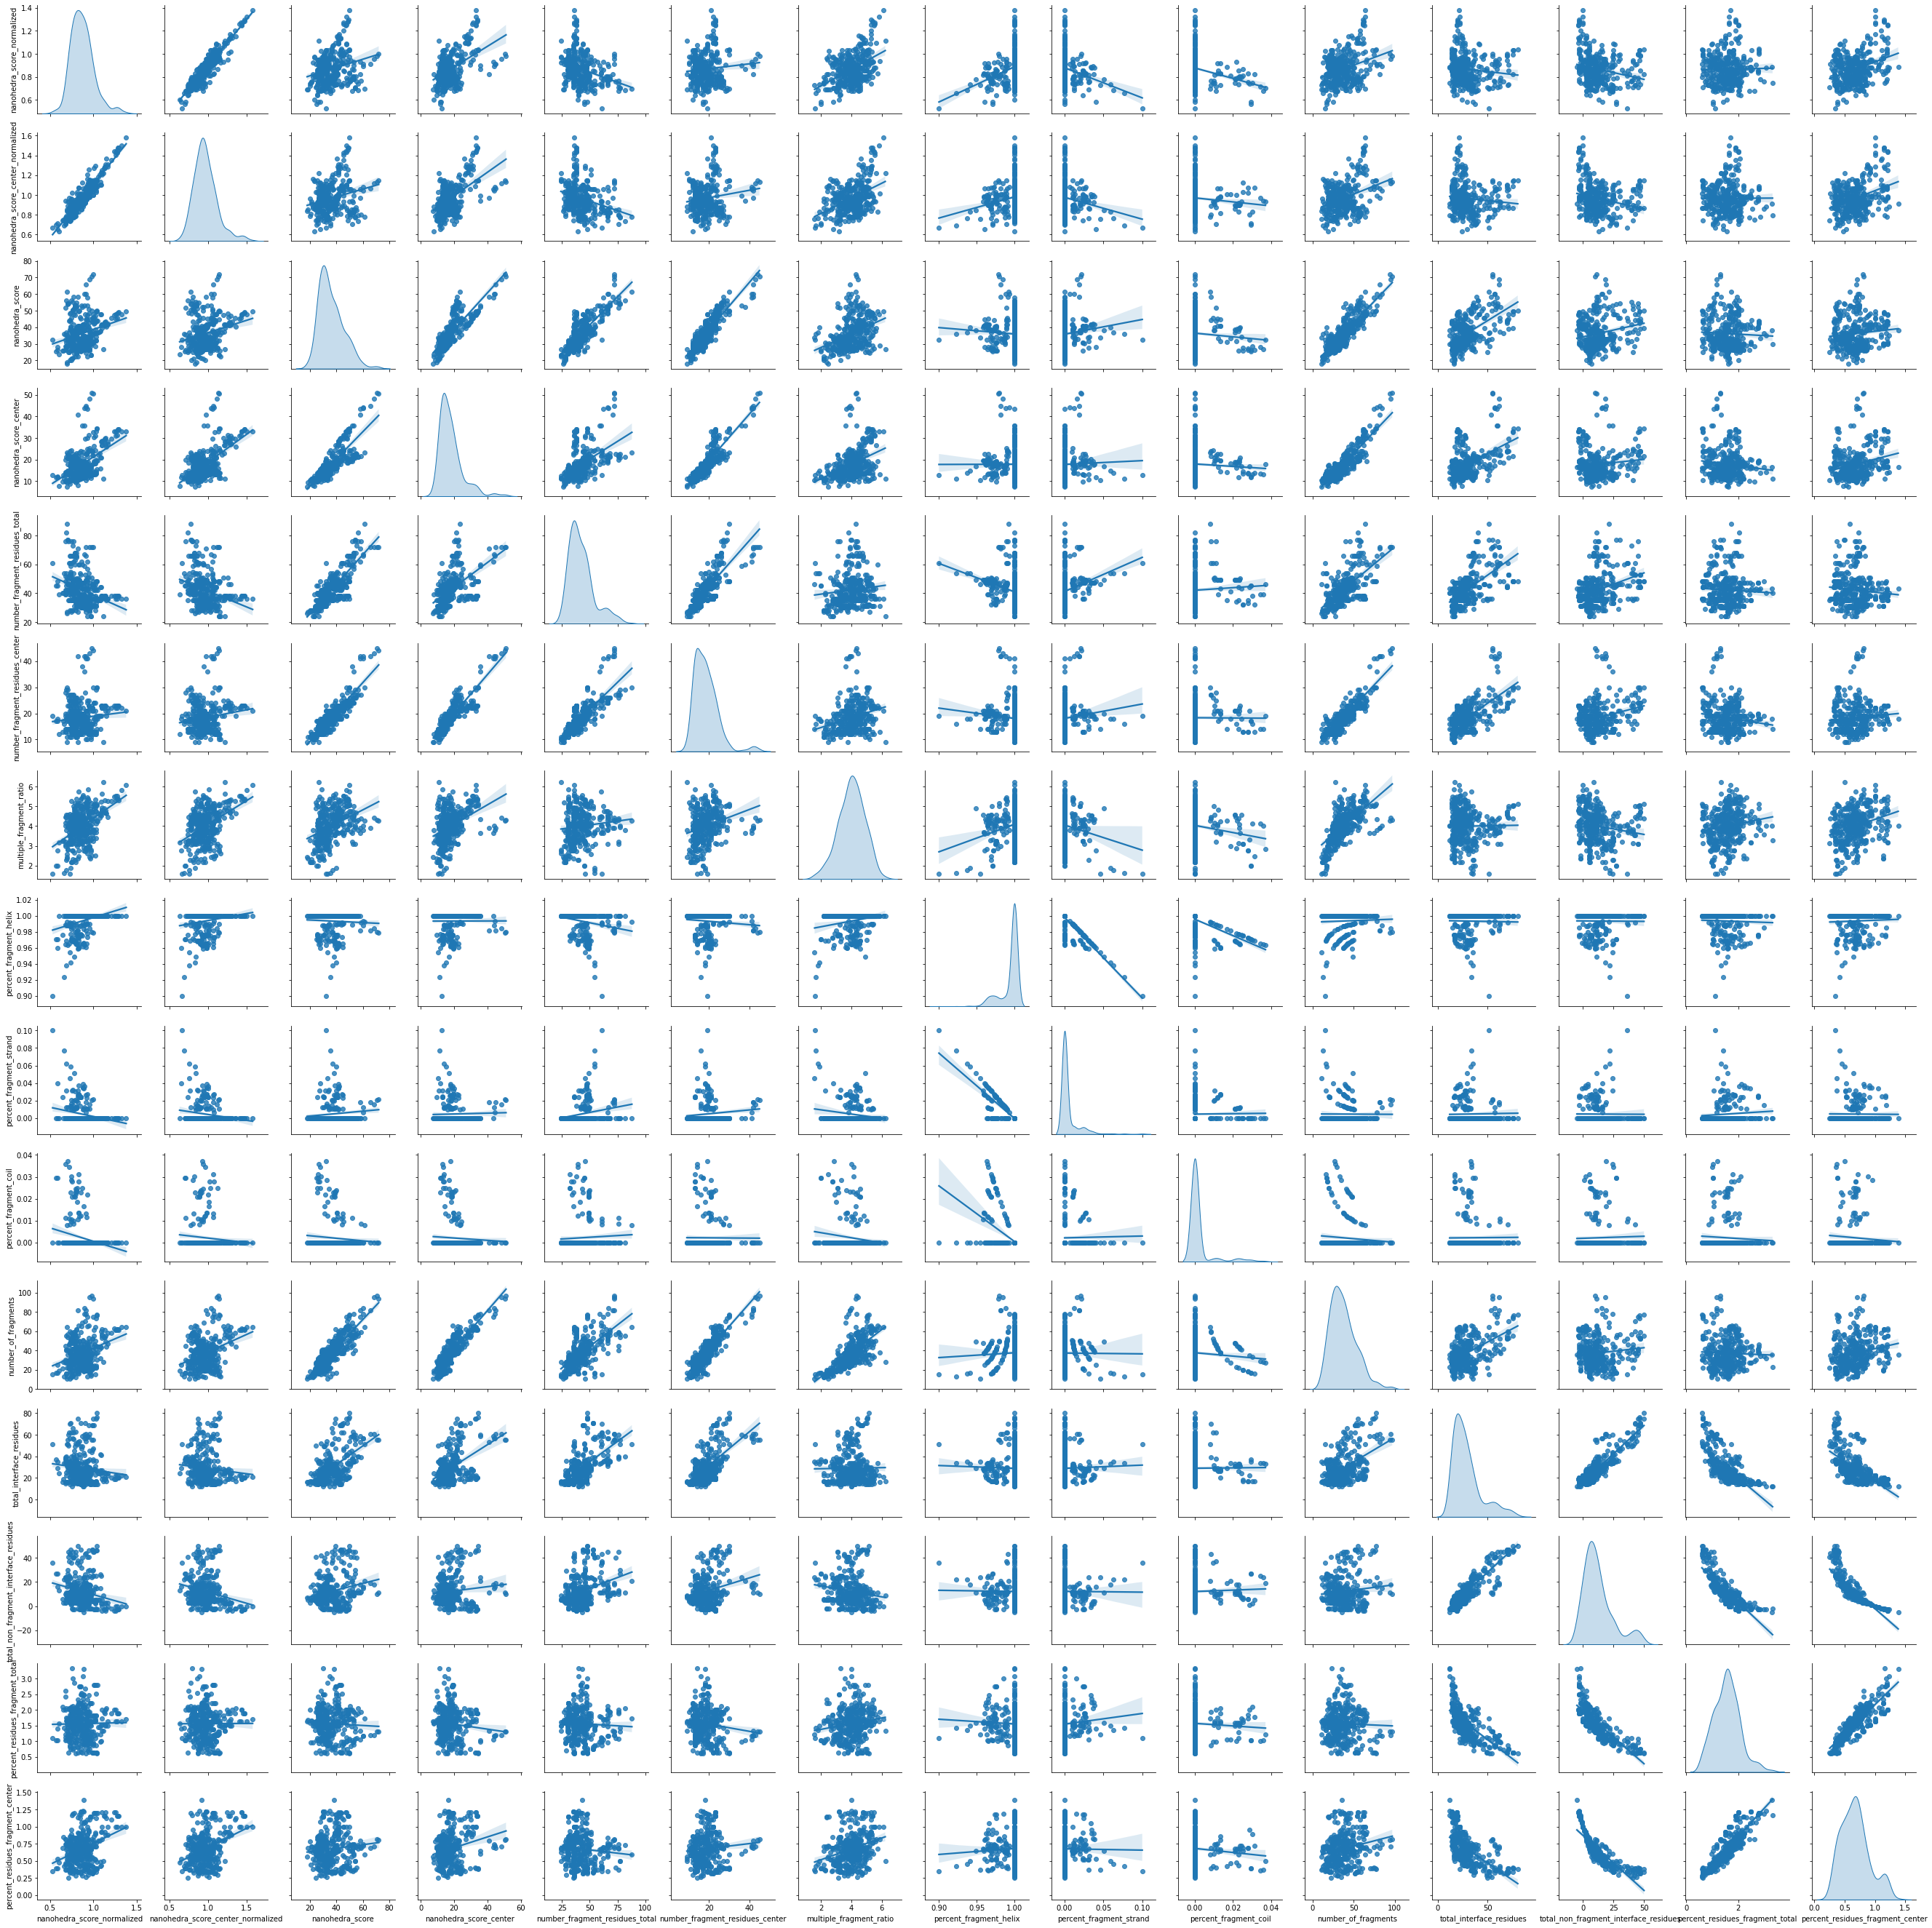

In [159]:
_ = sns.pairplot(target_and_numerical_trajectory_df.loc[df_plus_target.index, idx_slice['pose', nanohedra_metrics]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

# split training and test dataset

In [311]:
scaled_target_ = scaled_target_correct

In [217]:
# selected_nano_traj_df.index.get_level_values(1) == targets2d.index.values
for ind1, ind2 in zip(selected_nano_traj_df.index.get_level_values(1), targets2d.index.get_level_values(1)):
    print(ind1 == ind2)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Pull out the trajectory labels which are used for grouping the training data into contigous test/train pairs during LeaveOneGroupOut

In [312]:
trajectory_labels = train_traj_df.index.get_level_values(0)  # .levels[0]  # {label: number}
# trajectory_labels

In [257]:
for lab_ in trajectory_labels.unique():
    print(lab_)
    print(trajectory_labels[trajectory_labels.get_loc(lab_)].tolist().count(lab_))

2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58
17
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236
37
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413
10
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284
40
3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132
10
3pac_1zoi-DEGEN_1_1-ROT_12_34-tx_182
11
3pac_1zoi-DEGEN_1_1-ROT_14_32-tx_189
7
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193
55
3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201
38
3pac_1zoi-DEGEN_1_1-ROT_21_28-tx_179
14
3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_248
24
3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217
10
3pac_1zoi-DEGEN_1_1-ROT_19_34-tx_189
12
3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207
9
3pac_1zoi-DEGEN_1_1-ROT_3_30-tx_296
8
3pac_1zoi-DEGEN_1_1-ROT_6_28-tx_252
15
3pac_1zoi-DEGEN_1_1-ROT_5_23-tx_208
11
4mi2_4i61-DEGEN_1_1-ROT_12_12-tx_146
14
4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6
9
4mi2_4i61-DEGEN_1_2-ROT_3_5-tx_237
10
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176
7


## Produce a stratification scheme for the data so that the train and test have approximately equal representation from each clustered trajectory

In [313]:
# trajectory_train, trajectory_test, target_train, target_test = train_test_split(selected_nano_traj_df, target, random_state=42)
# trajectory_train, trajectory_test, target_train, target_test = train_test_split(selected_nano_traj_df, scaled_target_, random_state=42)
# trajectory_train2d, trajectory_test2d, target_train2d, target_test2d = train_test_split(selected_nano_traj_df, targets2d,
#                                                                                         random_state=42)
strat_k = StratifiedKFold(n_splits=3, shuffle=True)  # n_splits controls the size of the resulting train/test split (1/n_splits)
for strat_train, strat_test in strat_k.split(selected_nano_traj_df, trajectory_labels):
    print(strat_train, strat_test)

[  0   1   5   7   8   9  12  13  14  15  16  17  18  19  21  22  23  25
  26  27  28  29  30  32  33  34  35  37  38  41  43  44  46  48  51  53
  54  57  59  60  61  63  64  66  67  68  70  72  73  74  75  77  80  81
  83  84  86  87  88  90  91  93  94  95  96  98 100 101 102 104 105 106
 107 109 110 111 115 116 117 120 121 122 123 126 127 128 129 131 133 136
 137 138 140 141 144 145 146 148 150 151 152 154 155 156 157 158 159 161
 163 164 165 167 168 169 170 171 172 174 175 176 179 180 182 183 187 189
 190 191 192 193 194 195 196 197 199 200 201 203 207 209 210 214 215 217
 218 219 220 222 223 224 227 228 229 230 231 233 235 237 238 241 244 246
 248 249 250 251 253 254 256 257 258 259 260 261 262 263 264 265 266 267
 268 270 274 275 276 277 279 280 281 282 287 288 289 290 291 292 295 297
 299 300 301 304 305 308 309 310 311 312 313 314 316 317 319 321 322 323
 326 327 328 329 331 332 334 335 337 338 339 341 342 344 345 347 348 350
 351 352 354 357 359 360 361 364 365 366 367] [  2 

In [314]:
# trajectory_train = selected_nano_traj_df.iloc[strat_train, :]
# trajectory_test = scaled_target_.ravel()[strat_train]
trajectory_train, trajectory_test, target_train, target_test = selected_nano_traj_df.iloc[strat_train, :], selected_nano_traj_df.iloc[strat_test, :], scaled_target_.ravel()[strat_train], scaled_target_.ravel()[strat_test]
target_train2d, target_test2d = targets2d.iloc[strat_train, :], targets2d.iloc[strat_test, :]
print(trajectory_train.shape, trajectory_test.shape)
print(target_train.shape, target_test.shape)

(246, 15) (122, 15)
(246,) (122,)


In [296]:
trajectory_train

pose  \
                                                                        nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                   0.903287   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                   1.198917   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                   0.166221   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                   1.281726   
                                    2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76                   0.976401   
...                                                                                            ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_155                   0.344273   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                  -2.322223   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                   0.488115   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                   0.658868   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                   0.773914   

                                                                                                           \
                                                                        nanohedra_score_center_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                          0.781328   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                          1.253394   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                          0.468317   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                          1.337087   
                                    2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76                          0.890038   
...                                                                                                   ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_155                          0.341970   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174                         -2.284300   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197                          0.895231   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174                          0.595512   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176                          0.510320   

                                                                                         \
                                                                        nanohedra_score   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        0.900408   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89        1.318947   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        0.968811   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        1.436184   
                                    2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76        0.018809   
...                                                                                 ...   
4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176 4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_155        0.359713   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_30-tx_174       -2.366471   
                                    4mi2_4i61-DEGEN_1_2-ROT_5_31-tx_197        0.476426   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_174        0.614975   
                                    4mi2_4i61-DEGEN_1_2-ROT_6_28-tx_176        0.708323   

                                                                                                \
                                                                   

In [315]:
trajectory_labels_train = trajectory_train.index.get_level_values(0)
trajectory_labels_test = trajectory_test.index.get_level_values(0)
print(trajectory_labels_train.shape, trajectory_labels_test.shape)

(246,) (122,)


In [179]:
display(trajectory_train)
display(target_train)

pose  \
                                                                          nanohedra_score_normalized   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_267                    1.605255   
3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201 3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201                   0.158680   
3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207  3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_217                   -0.501602   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                    -0.119524   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_4_26-tx_211                    1.815976   
...                                                                                              ...   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301                    0.190099   
3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132 3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_152                  -0.178934   
3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217 3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_230                  -1.816677   
4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6   4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_28                    1.113153   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223                   -0.498524   

                                                                                                             \
                                                                          nanohedra_score_center_normalized   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_267                           1.301784   
3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201 3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201                          0.569716   
3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207  3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_217                          -0.235095   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                            0.332468   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_4_26-tx_211                           1.759398   
...                                                                                                     ...   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301                          -0.367299   
3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132 3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_152                         -0.142969   
3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217 3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_230                         -2.058867   
4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6   4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_28                           1.283825   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223                          -0.231388   

                                                                                           \
                                                                          nanohedra_score   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_3_27-tx_267        -1.031051   
3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201 3pac_1zoi-DEGEN_1_1-ROT_20_28-tx_201        0.713467   
3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_207  3pac_1zoi-DEGEN_1_1-ROT_4_24-tx_217        -0.592039   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382         -0.250216   
3pac_1zoi-DEGEN_1_1-ROT_18_28-tx_193 3pac_1zoi-DEGEN_1_1-ROT_4_26-tx_211        -0.603331   
...                                                                                   ...   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_24_2-tx_301        -0.169360   
3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_132 3pac_1zoi-DEGEN_1_1-ROT_13_36-tx_152        1.730189   
3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_217 3pac_1zoi-DEGEN_1_1-ROT_21_29-tx_230       -1.321464   
4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_6   4mi2_4i61-DEGEN_1_1-ROT_12_15-tx_28        -1.069210   
3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_284  3hrx_3m6n-DEGEN_1_1-ROT_23_3-tx_223         1.045717   

                                                                                         

array([[-0.58659718],
       [-0.37996112],
       [-1.94442417],
       [-0.22480775],
       [-0.88138857],
       [-1.10918191],
       [-0.51959914],
       [ 0.40688807],
       [ 1.45971445],
       [ 1.5877609 ],
       [ 0.11018246],
       [ 0.79102743],
       [ 0.21737932],
       [-1.0957823 ],
       [ 1.47694252],
       [-1.2333046 ],
       [ 0.72273599],
       [-0.39900266],
       [-0.14292126],
       [ 0.72273599],
       [ 1.37197892],
       [-0.96178622],
       [ 0.02085173],
       [-0.47940031],
       [-1.10918191],
       [-0.02381363],
       [-1.01538465],
       [ 0.6595664 ],
       [ 1.06988414],
       [-0.26359609],
       [ 0.25422825],
       [ 0.57358558],
       [ 1.34874086],
       [ 0.8069621 ],
       [ 2.14990063],
       [ 0.15364065],
       [-0.07741206],
       [-0.11952512],
       [ 0.51217071],
       [-1.14938074],
       [ 0.06998363],
       [-0.51959914],
       [ 0.20186399],
       [-0.09475273],
       [ 1.88786384],
       [-0

# Calculate model performance 
## NEW cross validation of model performance with LeaveOneGroupOut
### using alpha and l1_ratio cross-validation

In [160]:
alphas = np.logspace(-10, 10, 21)  # log space here has wider parameter fitting potential
l1_ratios = [.1, .5, .7, .9, .95, .99, 1] # values closer to 1 can be preferred to provide more lasso like behavior

## Testing these cross-validation methods

In [162]:
logo = LeaveOneGroupOut()
repeated_kfold = RepeatedStratifiedKFold()

In [292]:
for train, test in logo.split(selected_nano_traj_df, scaled_target_, groups=trajectory_labels):
    print("%s %s" % (train, test))

[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 26

In [223]:
for train, test in repeated_kfold.split(selected_nano_traj_df, trajectory_labels):
    print("%s %s" % (train, test))

[  2   3   4   5   6   7   8   9  11  12  14  15  16  18  19  20  21  22
  24  25  26  27  28  29  30  31  32  33  34  35  38  39  40  41  44  45
  46  47  48  49  51  52  53  54  55  56  57  58  59  61  63  65  66  67
  68  70  71  72  75  76  77  78  79  81  82  84  85  86  87  89  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110 111
 112 115 116 117 118 119 121 122 123 124 125 126 127 128 130 132 133 134
 136 137 139 140 142 143 144 145 146 147 148 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 165 166 167 168 169 171 172 173 174 175 176
 179 181 182 183 184 187 188 189 190 191 193 194 196 197 198 199 201 202
 203 204 205 206 208 211 212 213 214 215 216 217 218 219 221 222 223 224
 225 226 228 229 230 231 232 233 234 237 238 239 241 242 243 244 245 246
 247 249 250 252 253 254 255 256 259 260 261 262 263 264 266 267 268 271
 272 273 274 275 276 277 278 279 280 282 283 284 286 287 288 290 291 292
 294 295 296 298 299 300 301 302 303 304 305 306 30

/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/home/kylemeador/miniconda3/lib/python3.7/site-packa

These both produce indices as intended. I feel good taking forward into model training

In [331]:
cv1 = (split for split in repeated_kfold.split(selected_nano_traj_df, trajectory_labels))
cv2 = logo
logo_cv = list(logo.split(trajectory_train, groups=trajectory_labels_train)) # <- convert to iterable not generator
logo_full_cv = list(logo.split(selected_nano_traj_df, groups=trajectory_labels))


In [321]:
logo_cv

[(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
          25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
          38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
          51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
          90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
         103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
         116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
         129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
         142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
         155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
         168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
         181, 182, 183, 184, 185, 186,

In [332]:
# generate and compare models based on various scoring parameters
params_dict = dict(alphas=alphas, max_iter=10000, cv=logo_cv)
models = []
cv_model_strat, cv_models_logo = [], []
reg_scores, mae_scores = [], []
for lin_reg, model in possible_lin_reg.items():
    if lin_reg.startswith('MultiTask'):
        trajectory_train_, trajectory_test_ = trajectory_train, trajectory_test
        target_train_, target_test_ = target_train2d, target_test2d
        print('MultiTask Model: %s' % lin_reg)
        target_ = targets2d
    else:
        trajectory_train_, trajectory_test_ = trajectory_train, trajectory_test
        target_train_, target_test_ = target_train.ravel(), target_test.ravel()
        target_ = scaled_target_.ravel()
        print('Model: %s' % lin_reg)
    # use a cross validation split to train the models on multiple train test splits
    # cv1 is for RepeatedStratifiedKFold, cv2 LeaveOneGroupOut
#     cv_model_strat.append(cross_validate(model.set_params(l1_ratio=l1_ratios, **params_dict), 
#                                          selected_nano_traj_df, scaled_target_, 
#                                          cv=cv1, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
#     cv_models_logo.append(cross_validate(model.set_params(**params_dict, l1_ratio=l1_ratios), 
#                                          selected_nano_traj_df, scaled_target_, groups=trajectory_labels, 
#                                          cv=cv2, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
        
    # else:
    #     target = target_train
    if lin_reg.startswith('ElasticNetCV'):
        test_reg = model.set_params(**params_dict, l1_ratio=l1_ratios).fit(trajectory_train_, target_train_)  # fit_intercept=False,
#         cv_models_logo.append(cross_validate(model.set_params(l1_ratio=l1_ratios, **params_dict), 
#                               selected_nano_traj_df, target_, groups=trajectory_labels, 
#                               cv=cv2, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
#         cv_model_strat.append(cross_validate(model.set_params(l1_ratio=l1_ratios, **params_dict), 
#                               selected_nano_traj_df, target_, 
#                               cv=cv1, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
    else:
        test_reg = model.set_params(**params_dict).fit(trajectory_train_, target_train_)   # fit_intercept=False,
#         cv_models_logo.append(cross_validate(model.set_params(**params_dict), 
#                               selected_nano_traj_df, target_, groups=trajectory_labels, 
#                               cv=cv2, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
#         cv_model_strat.append(cross_validate(model.set_params(**params_dict), 
#                               selected_nano_traj_df, target_, 
#                               cv=cv1, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
    cv_models_logo.append(cross_validate(test_reg, selected_nano_traj_df, target_, groups=trajectory_labels, 
                                         cv=logo_full_cv, scoring=('neg_median_absolute_error', 'r2'), return_estimator=True))
    
    reg_scores.append(test_reg.score(trajectory_train_, target_train_))
    target_test_prediction = test_reg.predict(trajectory_test_)  # target_test
    # for MultiTask, the median_absolute_error is a weighted average of all Task errors. multioutput='raw_values’ would provide each
    mae_scores.append(median_absolute_error(target_test_, target_test_prediction))
    models.append(test_reg)

MultiTask Model: MultiTaskLassoCV
Model: LassoCV
MultiTask Model: MultiTaskElasticNetCV
Model: ElasticNetCV


## Big Detail that I found
#### I ran the cv and models with an incorrect scaling. It turns out, when I was generating the selection_weight, I was returning sorted values, however, the trajectory that I was splitting was from the original, unsorted values. This gave me the wrong splits and was present on the previous models!!! V1 and V2 had this issue and the linear, non multitask were able to fit the data well. In contrast the non-multitask were unable to fit this data well, so I wonder how this bodes for success moving forward.  
#### I am very cautious that this will work now given that difficulty and the overfitting that appeared. I would accept an accuracy of 0.5 percent as a way to get me closer to the desired outcome. If I can get the top 5 then I can put these all through Rosetta.
#### Another detail. My inversion seems to be causing more harm than good. I had almost no coefficients which is odd as the models should fit some coefficients to describe the data the best
Below are the accurately calculated cv which I will investigate for coefficients. Below this were the previous ouputs

In [326]:
cv_models_logo

[{'fit_time': array([0.41525936, 0.35025191, 0.4725287 , 0.34251666, 0.33840632,
         0.59468651, 0.35770988, 1.20126152, 0.33368444, 0.29881668,
         0.33512568, 0.33191919, 0.33482552, 0.33776903, 0.33502746,
         0.33489919, 0.32874107, 0.33533692, 0.32580924, 0.33524036,
         0.32272506]),
  'score_time': array([0.00257301, 0.00242162, 0.00261617, 0.00240707, 0.00242901,
         0.00254512, 0.00263429, 0.002599  , 0.00255466, 0.00255251,
         0.00246978, 0.00272751, 0.00263667, 0.00232482, 0.00234461,
         0.0023427 , 0.00256681, 0.00232768, 0.00235271, 0.00236297,
         0.0023396 ]),
  'estimator': [MultiTaskLassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
          1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
          1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                    cv=[(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
           25,  26,  27,  28,  29,  30,  3

here is the inverted model results. The weird thing is none have coefficients...

In [289]:
cv_models_logo

[{'fit_time': array([0.41069651, 0.34575343, 0.48581123, 0.33752465, 0.35547209,
         0.58580446, 0.36585021, 1.18246579, 0.34333205, 0.29119277,
         0.33914042, 0.32555747, 0.31586409, 0.32512927, 0.32841301,
         0.32616878, 0.3290205 , 0.32558918, 0.32645774, 0.32811666,
         0.3241303 ]),
  'score_time': array([0.00264263, 0.00258279, 0.00260997, 0.00257421, 0.00294137,
         0.00260758, 0.00259638, 0.00269699, 0.00261545, 0.00248098,
         0.00232911, 0.00233173, 0.0023396 , 0.00239277, 0.00253248,
         0.00235176, 0.00243163, 0.00240803, 0.00252891, 0.00235963,
         0.00234604]),
  'estimator': [MultiTaskLassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
          1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
          1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                    cv=[(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
           25,  26,  27,  28,  29,  30,  3

These models have the incorrectly coupled targets and training data

In [176]:
cv_models_logo

[{'fit_time': array([0.09060526, 0.08910871, 0.10016179, 0.08135533, 0.08194709,
         0.08752441, 0.08293772, 0.09129882, 0.10747671, 0.08765697,
         0.08236647, 0.08535719, 0.08623433, 0.08422136, 0.09081864,
         0.08440065, 0.08893204, 0.08073974, 0.0803051 , 0.10788035,
         0.08744192, 0.08272791, 0.08889794]),
  'score_time': array([0.00259638, 0.00264406, 0.00258899, 0.0023241 , 0.00231552,
         0.0023241 , 0.00253606, 0.00244641, 0.00258493, 0.00257754,
         0.00231242, 0.00232196, 0.00265789, 0.00254083, 0.00233984,
         0.00230503, 0.00256371, 0.00257206, 0.00232697, 0.00242233,
         0.00251389, 0.00254226, 0.00251889]),
  'estimator': [MultiTaskLassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
          1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
          1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                    max_iter=10000),
   MultiTaskLassoCV(alphas=array([1.e-10, 1.e-09, 1.e-

In [318]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.11573260050698082 0.7086759763835642
0.0 0.6663208976681441
0.022009783556827277 0.7373547788827798
0.04948336553603583 0.723920612816396


This set was for the inverted trajectory training data and has incorrect weighted sums for the non-MultiTask. I expect changing these will improve their performance drastically

In [290]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.10548930832478116 0.6652335475481065
0.0 0.6691095943502092
0.023578938304548446 0.7177323086556552
0.0 0.6691095943502092


This is for the scaled (targets have been StandardScaled), expanded dataset. The values for linear models have plummetted drastically!
This is for the same method as below when the scaling procedure returned newly ordered dataframes which are incorrect. Where is the decrease in accuracy? was I overfitting to bad data?!?

In [177]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.10316317252256176 0.6857830041917363
0.17428545121518213 0.6375506669307182
0.11696493416927431 0.6843683092780682
0.1828194011636357 0.6082913777925323


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Target2D on inverted dataframe (negative desired values to positive). Target training on individual clustered trajectory sum.

In [136]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3012699344999672 0.6652513049787316
0.818951153844806 0.05429889232066987
0.34935350684913025 0.6648379370321049
0.8293637607894965 0.06803235254755174


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Target2D on inverted dataframe (negative desired values to positive). Target training on individual clustered trajectory sum.

In [142]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.8208480104074776 0.047367027056941846
0.3928776442473056 0.6482466079734173
0.8300791764584348 0.059220600252942096


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Target training was on individual clustered trajectory sum! This modification only affects the SingleTask regression models

In [44]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.7803250847426138 0.03263704875493617
0.3928776442473056 0.6482466079734173
0.797920135655878 0.037720506451980745


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000

In [18]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.21096974102790222 0.0893966867448259
0.3928776442473056 0.6482466079734173
0.2065261254750892 0.08865536289316048


This was after l1_ratio parameterization, fit_intercept=False, and with max_iter=10000

In [16]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3494179638902075 0.6096208354705787
-34.01674525341987 0.496875
0.38904238396282725 0.6338522374592721
-34.01674525341987 0.496875


This was before l1_ratio parameterization and with max_iter=1000 (default)

In [117]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3540770816339951 0.6351221542636988
0.21096974102790222 0.0893966867448259
0.3928776442473056 0.6482466079734173
0.2550677505971852 0.08712489095826167


# Best score possible is 1, best MAE is 0.  
From this analysis Lasso works the best with oriented, individually summed training data
## Coefficient Analysis of this data

In [337]:
# for idx, model in enumerate(models):
print(models[2].coef_, models[2].alpha_, models[2].l1_ratio_)
print(models[3].coef_, models[3].alpha_, models[3].l1_ratio_)
print(models[0].coef_, models[0].alpha_)
print(models[1].coef_, models[1].alpha_)
# print(models[1].coef_[:, np.newaxis])
pd.Series(models[1].coef_, index=nanohedra_metrics)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.01522328
   0.0107291   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.01909184
   0.0304614   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.03824121
  -0.03764005  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.00192752
  -0.00067056  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.00304873
  -0.00287484  0.          0.        ]] 1.0 0.5
[-0.          0.          0.0136113   0.          0.03892035  0.02858561
  0.         -0.       

nanohedra_score_normalized              -0.0
nanohedra_score_center_normalized        0.0
nanohedra_score                          0.0
nanohedra_score_center                   0.0
number_fragment_residues_total           0.0
number_fragment_residues_center          0.0
multiple_fragment_ratio                  0.0
percent_fragment_helix                  -0.0
percent_fragment_strand                  0.0
percent_fragment_coil                   -0.0
number_of_fragments                      0.0
total_interface_residues                 0.0
total_non_fragment_interface_residues    0.0
percent_residues_fragment_total          0.0
percent_residues_fragment_center         0.0
dtype: float64

In [123]:
no_multi_df = pd.concat([pd.Series(models[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df = pd.concat([pd.DataFrame(models[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df = pd.concat([multi_df, no_multi_df.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df)

nanohedra_score_normalized  \
MultiTaskLassoCV      shape_complementarity                              -0.049912   
                      interface_composition_similarity                   -0.011008   
                      interface_energy                                   -0.015595   
                      rmsd                                                0.005965   
                      solvation_energy                                   -0.015842   
MultiTaskElasticNetCV shape_complementarity                              -0.050582   
                      interface_composition_similarity                   -0.023965   
                      interface_energy                                   -0.015726   
                      rmsd                                               -0.005048   
                      solvation_energy                                   -0.000729   
LassoCV               weighted_sum                                        0.007436   
ElasticNetCV          weighted_sum                                        0.039795   

                                                        nanohedra_score_center_normalized  \
MultiTaskLassoCV      shape_complementarity                                      0.000000   
                      interface_composition_similarity                           0.000000   
                      interface_energy                                           0.000000   
                      rmsd                                                       0.000000   
                      solvation_energy                                           0.000000   
MultiTaskElasticNetCV shape_complementarity                                      0.009746   
                      interface_composition_similarity                          -0.015844   
                      interface_energy                                          -0.152896   
                      rmsd                                                       0.140675   
                      solvation_energy                                           0.025097   
LassoCV               weighted_sum                                               0.069686   
ElasticNetCV          weighted_sum                                               0.082115   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                    0.000000   
                      interface_composition_similarity         0.000000   
                      interface_energy                         0.000000   
                      rmsd                                     0.000000   
                      solvation_energy                         0.000000   
MultiTaskElasticNetCV shape_complementarity                    0.000000   
                      interface_composition_similarity         0.000000   
                      interface_energy                         0.000000   
                      rmsd                                     0.000000   
                      solvation_energy                         0.000000   
LassoCV               weighted_sum                            -0.033772   
ElasticNetCV          weighted_sum                            -0.084285   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
                      rmsd                                                 0.0   
                      solvation_energy                                     0.0   
MultiTaskElasticNetCV shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
             

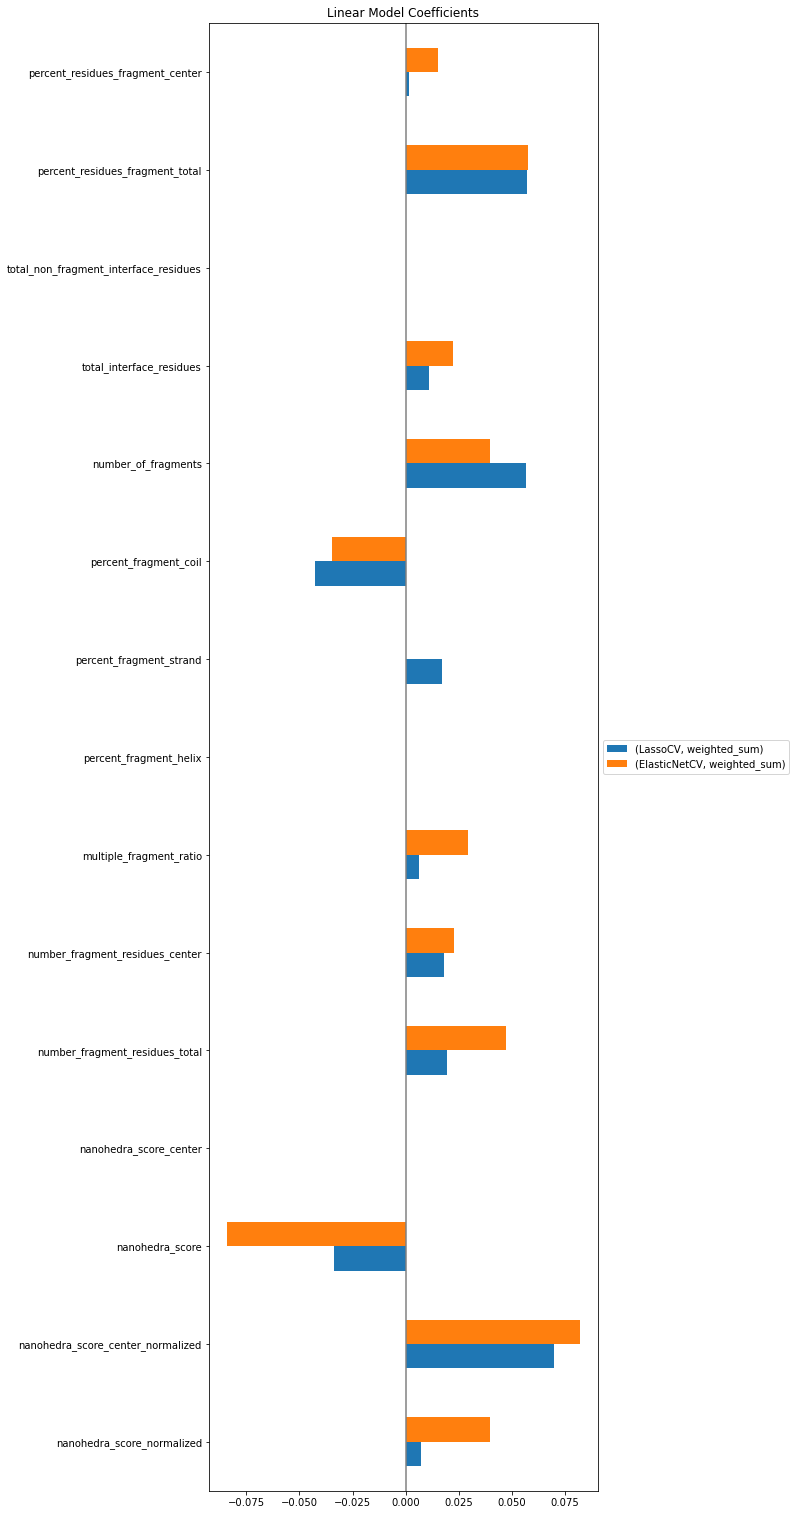

In [125]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
# ax = coefficient_df.loc[idx_slice[['MultiTaskLassoCV', 'MultiTaskElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))
ax = coefficient_df.loc[idx_slice[['LassoCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Text(0.5, 0, 'Truths')

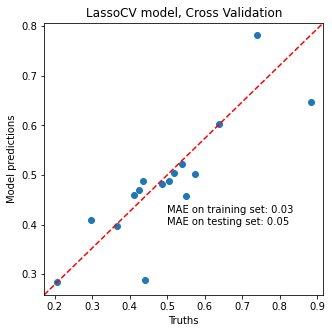

In [153]:
model_idx = 1
y_pred_train = models[model_idx].predict(trajectory_train_)

mae = median_absolute_error(target_train_, y_pred_train)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction = models[model_idx].predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

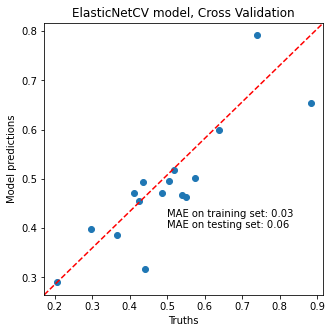

In [150]:
model_idx = 3
y_pred_train = models[model_idx].predict(trajectory_train_)

mae = median_absolute_error(target_train_, y_pred_train)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction = models[model_idx].predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

## This was coefficient analysis for the data before individual cluster trajectory weighting for SingleTask and before orientational inversion

In [21]:
# for idx, model in enumerate(models):
print(models[2].coef_, models[2].alpha_, models[2].l1_ratio_)
print(models[3].coef_, models[3].alpha_, models[3].l1_ratio_)
print(models[0].coef_, models[0].alpha_)
print(models[1].coef_, models[1].alpha_)

# print(models[1].coef_[:, np.newaxis])
pd.Series(models[1].coef_, index=nanohedra_metrics)

[[-0.0505819   0.00974604  0.          0.          0.28351948  0.06790319
  -0.03801343  0.         -0.07832777  0.12826676 -0.01662615 -0.20777733
  -0.12588667 -0.39949415 -0.45906072]
 [ 0.02396507  0.01584352  0.          0.         -0.00236704  0.27063295
  -0.04519105  0.         -0.03276501  0.08219598  0.00988126 -0.0020393
   0.0098284  -0.51105603 -0.28458109]
 [-0.01572616 -0.15289626  0.          0.          0.02235838  0.25973449
   0.04142863  0.          0.03284726 -0.12279305  0.05802658  0.13050585
  -0.19538129 -0.12360106 -0.08047522]
 [ 0.00504822 -0.14067543  0.          0.         -0.08400461  0.08277774
   0.07398706  0.          0.04726839 -0.00977635  0.03706068  0.24944759
   0.07580393 -0.23637186  0.04519595]
 [ 0.00072932 -0.02509739  0.          0.         -0.14240639 -0.09800012
   0.08027201  0.         -0.0254923   0.18342899  0.05244995 -0.43770626
  -0.27680872 -0.18140337 -0.18192824]] 0.1 0.5
[-0.          0.          0.          0.          0.     

nanohedra_score_per_res                 -0.000000
nanohedra_score_center_per_res_center   -0.000000
nanohedra_score                          0.000000
nanohedra_score_center                   0.000000
number_fragment_residues_total           0.000000
number_fragment_residues_center          0.000000
multiple_fragment_ratio                  0.015037
percent_fragment_helix                  -0.000000
percent_fragment_strand                  0.000000
percent_fragment_coil                   -0.000000
number_of_fragments                      0.014533
total_interface_residues                -0.000000
total_non_fragment_interface_residues   -0.000000
percent_residues_fragment_total          0.002876
percent_residues_fragment_center         0.002529
dtype: float64

In [23]:
no_multi_df = pd.concat([pd.Series(models[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df = pd.concat([pd.DataFrame(models[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df = pd.concat([multi_df, no_multi_df.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df)

nanohedra_score_per_res  \
MultiTaskLassoCV      shape_complementarity                           -0.049912   
                      interface_composition_similarity                 0.011008   
                      interface_energy                                -0.015595   
                      rmsd                                            -0.005965   
                      solvation_energy                                 0.015842   
MultiTaskElasticNetCV shape_complementarity                           -0.050582   
                      interface_composition_similarity                 0.023965   
                      interface_energy                                -0.015726   
                      rmsd                                             0.005048   
                      solvation_energy                                 0.000729   
LassoCV               weighted_sum                                    -0.000000   
ElasticNetCV          weighted_sum                                    -0.000000   

                                                        nanohedra_score_center_per_res_center  \
MultiTaskLassoCV      shape_complementarity                                          0.000000   
                      interface_composition_similarity                               0.000000   
                      interface_energy                                               0.000000   
                      rmsd                                                           0.000000   
                      solvation_energy                                               0.000000   
MultiTaskElasticNetCV shape_complementarity                                          0.009746   
                      interface_composition_similarity                               0.015844   
                      interface_energy                                              -0.152896   
                      rmsd                                                          -0.140675   
                      solvation_energy                                              -0.025097   
LassoCV               weighted_sum                                                  -0.000000   
ElasticNetCV          weighted_sum                                                   0.000000   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                         0.0   
                      interface_composition_similarity              0.0   
                      interface_energy                              0.0   
                      rmsd                                          0.0   
                      solvation_energy                              0.0   
MultiTaskElasticNetCV shape_complementarity                         0.0   
                      interface_composition_similarity              0.0   
                      interface_energy                              0.0   
                      rmsd                                          0.0   
                      solvation_energy                              0.0   
LassoCV               weighted_sum                                  0.0   
ElasticNetCV          weighted_sum                                  0.0   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
                      rmsd                                                 0.0   
                      solvation_energy                                     0.0   
MultiTaskElasticNetCV shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   


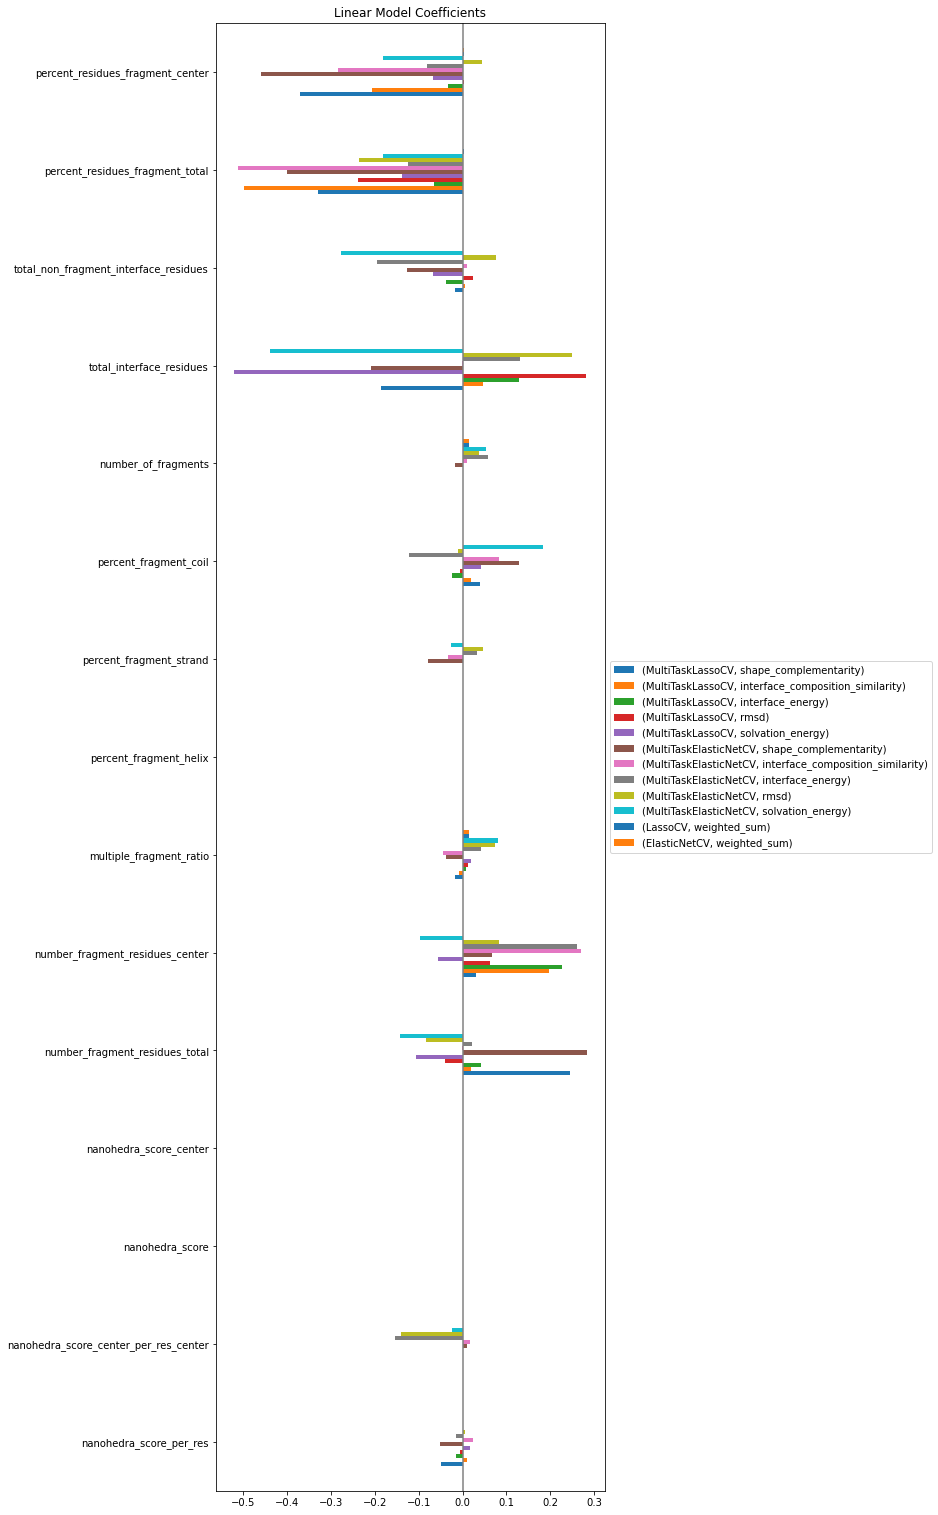

In [26]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
ax = coefficient_df.loc[idx_slice[:, :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [98]:
y_pred_train = models[2].predict(trajectory_train_)
y_pred_test = models[2].predict(trajectory_test_)

# mae = median_absolute_error(target_train_, y_pred_train)
# string_score = f'MAE on training set: {mae:.2f}'
# y_pred_test = test_reg.predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[2]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('MultiTaskElasticNet model, Cross Validation')
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

# Model Validation and check for overfitting

In [172]:
# split training and test dataset
trajectory_train_VAL, trajectory_test_VAL, target_train_VAL, target_test_VAL = train_test_split(selected_nano_traj_df, target, random_state=2, stratify=target)
trajectory_train2d_VAL, trajectory_test2d_VAL, target_train2d_VAL, target_test2d_VAL = train_test_split(selected_nano_traj_df, targets2d,
                                                                                                        random_state=2, stratify=target)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [171]:
trajectory_test_VAL

pose  \
                                                                          nanohedra_score_normalized   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241                  -0.750611   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                    0.903287   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299                   0.453237   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                    -0.089068   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                   1.719528   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225                  -2.212125   
                                     2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                   0.391814   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257                   0.063575   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208                  -1.953901   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212                  -2.135742   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                    1.237275   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257                   0.275272   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                   0.491551   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245                   0.327833   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71                    0.817693   
                                     2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68                   -1.313103   

                                                                                                             \
                                                                          nanohedra_score_center_normalized   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241                         -0.647025   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                           0.781328   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299                          0.293340   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                            0.215160   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                          1.942242   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225                         -2.218642   
                                     2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                          0.643998   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257                         -0.058084   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208                         -2.042998   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212                         -1.980405   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                           1.346699   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257                          0.076006   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                          0.146539   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245                          0.308135   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71                           0.648233   
                                     2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68                          -1.096298   

                                                                                           \
                                                                          nanohedra_score   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2

Text(0.5, 0, 'Truths')

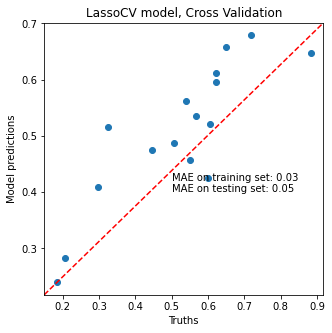

In [155]:
model_idx = 1
y_pred_train_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

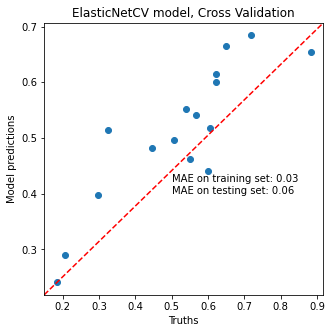

In [156]:
model_idx = 3
y_pred_train_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [157]:
# Calculate model performance with cross-validation, alpha tuning
alphas = np.logspace(-10, 10, 21)  # Todo why log space here? BETTER parameter space
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
# then compare between models based on various model scoring parameters
reg_scores_VAL, mae_scores_VAL = [], []
models_VAL = []
for lin_reg, model in possible_lin_reg.items():
    if lin_reg.startswith('MultiTask'):
        trajectory_train_, trajectory_test_ = trajectory_train2d_VAL, trajectory_test2d_VAL
        target_train_, target_test_ = target_train2d_VAL, target_test2d_VAL
        print('MultiTask Model: %s' % lin_reg)
    else:
        trajectory_train_, trajectory_test_ = trajectory_train_VAL, trajectory_test_VAL
        target_train_, target_test_ = target_train_VAL, target_test_VAL
        print('Model: %s' % lin_reg)
    # else:
    #     target = target_train
    if lin_reg.startswith('ElasticNetCV'):
        test_reg = model(alphas=alphas, max_iter=10000, l1_ratio=l1_ratios).fit(trajectory_train_, target_train_)  # fit_intercept=False,
    else:
        test_reg = model(alphas=alphas, max_iter=10000).fit(trajectory_train_, target_train_)   # fit_intercept=False,
    reg_scores_VAL.append(test_reg.score(trajectory_train_, target_train_))
    target_test_prediction = test_reg.predict(trajectory_test_)  # target_test
    # for MultiTask, the median_absolute_error is a weighted average of all Task errors. multioutput='raw_values’ would provide each
    mae_scores_VAL.append(median_absolute_error(target_test_, target_test_prediction))
    models_VAL.append(test_reg)

MultiTask Model: MultiTaskLassoCV
Model: LassoCV
MultiTask Model: MultiTaskElasticNetCV
Model: ElasticNetCV


In [158]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.8208480104074776 0.047367027056941846
0.3928776442473056 0.6482466079734173
0.8300791764584348 0.059220600252942096


Text(0.5, 0, 'Truths')

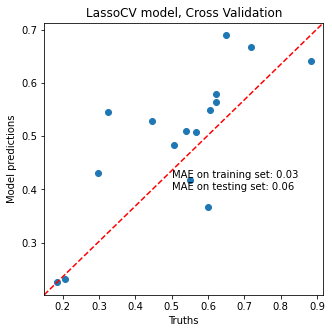

In [159]:
model_idx = 1
y_pred_train_VAL = models_VAL[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models_VAL[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

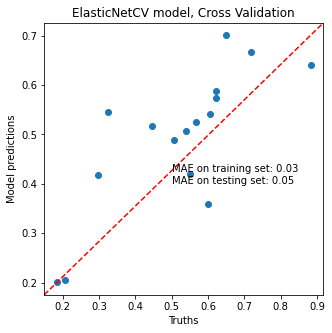

In [160]:
model_idx = 3
y_pred_train_VAL = models_VAL[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models_VAL[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [167]:
print(models[3].coef_)
print(models_VAL[3].coef_)

[ 0.03979515  0.08211509 -0.08428519  0.          0.04735407  0.02258651
  0.02946228  0.          0.         -0.03448775  0.03964175  0.02232523
 -0.          0.05775739  0.01513059]
[ 0.          0.02635187  0.          0.01508713  0.          0.
  0.03368271  0.          0.         -0.01023663  0.05125414  0.
 -0.          0.04128333  0.        ]


In [161]:
no_multi_df_VAL = pd.concat([pd.Series(models_VAL[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models_VAL[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df_VAL = pd.concat([pd.DataFrame(models_VAL[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models_VAL[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df_VAL = pd.concat([multi_df_VAL, no_multi_df_VAL.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df_VAL)

nanohedra_score_normalized  \
MultiTaskLassoCV      shape_complementarity                              -0.249794   
                      interface_composition_similarity                   -0.005796   
                      interface_energy                                   -0.137235   
                      rmsd                                                0.114493   
                      solvation_energy                                   -0.097832   
MultiTaskElasticNetCV shape_complementarity                              -0.277060   
                      interface_composition_similarity                    0.033610   
                      interface_energy                                   -0.116617   
                      rmsd                                                0.106587   
                      solvation_energy                                   -0.049051   
LassoCV               weighted_sum                                        0.000000   
ElasticNetCV          weighted_sum                                        0.000000   

                                                        nanohedra_score_center_normalized  \
MultiTaskLassoCV      shape_complementarity                                     -0.005567   
                      interface_composition_similarity                          -0.004308   
                      interface_energy                                          -0.054744   
                      rmsd                                                       0.042524   
                      solvation_energy                                          -0.010924   
MultiTaskElasticNetCV shape_complementarity                                      0.021226   
                      interface_composition_similarity                           0.010369   
                      interface_energy                                          -0.226510   
                      rmsd                                                       0.172436   
                      solvation_energy                                           0.001188   
LassoCV               weighted_sum                                               0.019689   
ElasticNetCV          weighted_sum                                               0.026352   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                   -0.007406   
                      interface_composition_similarity        -0.049788   
                      interface_energy                        -0.092772   
                      rmsd                                     0.060185   
                      solvation_energy                        -0.034837   
MultiTaskElasticNetCV shape_complementarity                    0.025923   
                      interface_composition_similarity        -0.136127   
                      interface_energy                        -0.212713   
                      rmsd                                     0.112556   
                      solvation_energy                        -0.095946   
LassoCV               weighted_sum                             0.000000   
ElasticNetCV          weighted_sum                             0.000000   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                           0.000000   
                      interface_composition_similarity                0.000000   
                      interface_energy                                0.000000   
                      rmsd                                            0.000000   
                      solvation_energy                                0.000000   
MultiTaskElasticNetCV shape_complementarity                           0.000000   
                      interface_composition_similarity                0.000000   
                      interface_energy                                0.000000   
             

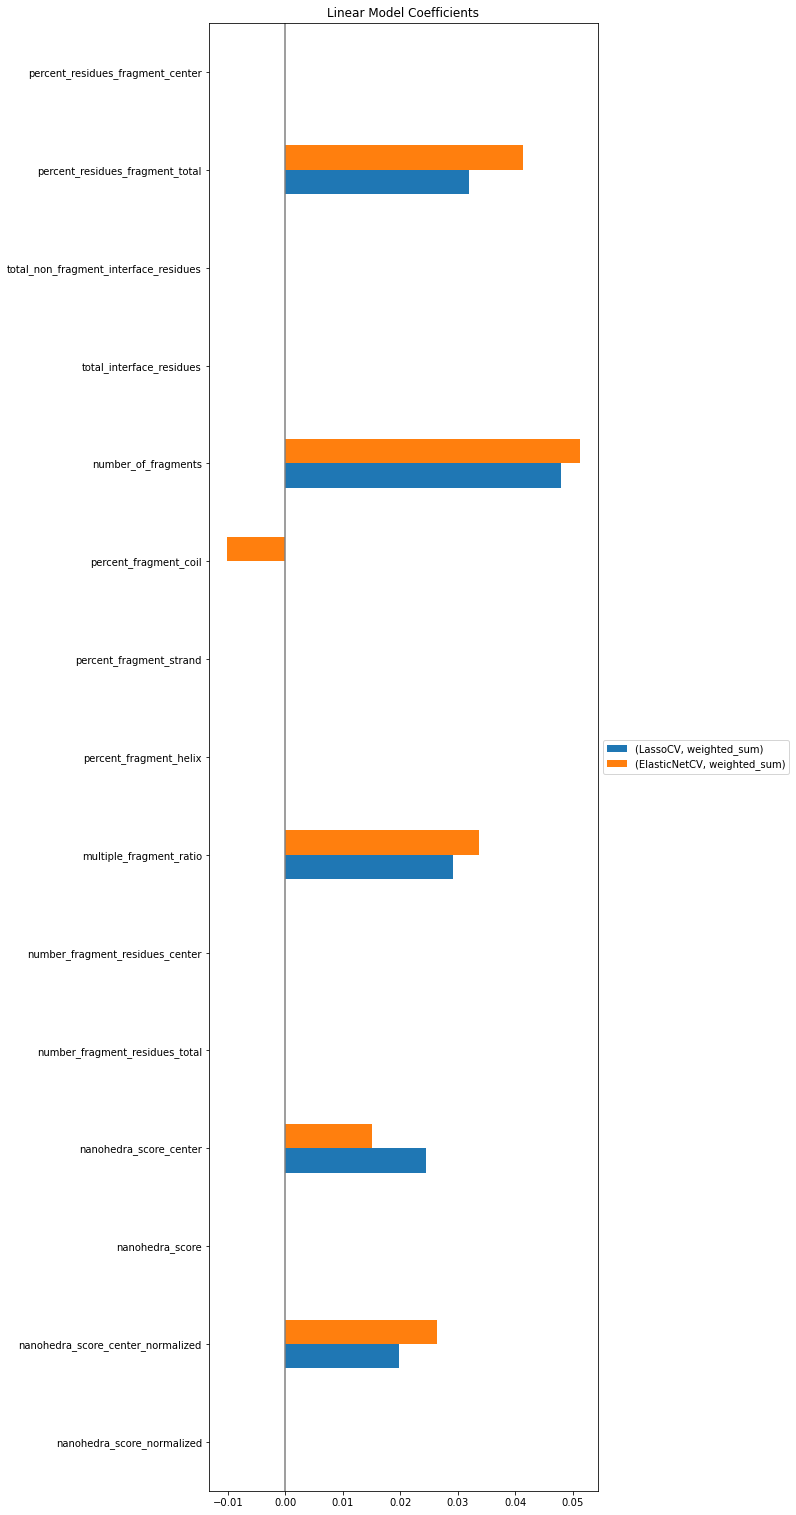

In [162]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
# ax = coefficient_df.loc[idx_slice[['MultiTaskLassoCV', 'MultiTaskElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))
ax = coefficient_df_VAL.loc[idx_slice[['LassoCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Text(0.5, 0, 'Truths')

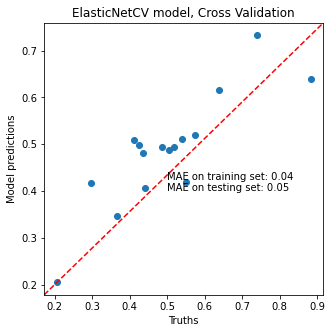

In [164]:
model_idx = 3
y_pred_train_VAL_VAL = models_VAL[model_idx].predict(trajectory_train)

mae = median_absolute_error(target_train, y_pred_train_VAL_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL_VAL = models_VAL[model_idx].predict(trajectory_test)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test, target_test_prediction_VAL_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'New Model, Original Split test')

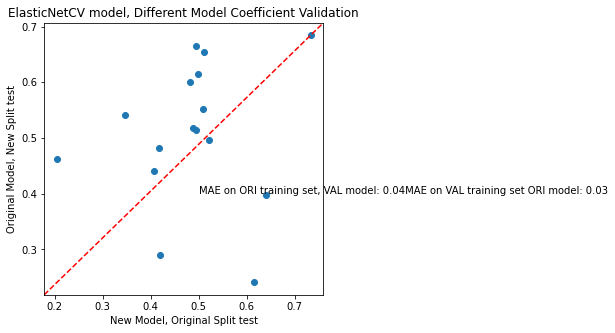

In [168]:
model_idx = 3
y_pred_train_VAL_ORI = models_VAL[model_idx].predict(trajectory_train)
y_pred_train_ORI_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train, y_pred_train_VAL_ORI)
string_score = f'MAE on ORI training set, VAL model: {mae:.2f}'
mae = median_absolute_error(target_train_VAL, y_pred_train_ORI_VAL)
string_score += f'\nMAE on VAL training set ORI model: {mae:.2f}'


target_test_prediction_VAL_ORI = models_VAL[model_idx].predict(trajectory_test)
target_test_prediction_ORI_VAL = models[model_idx].predict(trajectory_test_VAL)

# mae = median_absolute_error(y_test, y_pred_test)
# string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_prediction_VAL_ORI, target_test_prediction_ORI_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Different Model Coefficient Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Original Model, New Split test')
plt.xlabel('New Model, Original Split test')

# Checking the model on new data that doesn't have deep trajectories